<a href="https://colab.research.google.com/github/aadedolapo/Deep-Learning-Assesment/blob/main/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Fri May 26 00:18:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.14                 Driver Version: 531.14       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650       WDDM | 00000000:01:00.0  On |                  N/A |
| N/A   49C    P8                4W /  N/A|    249MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# !pip install -q split-folders[full]

# Import Neccessary Libraries

In [ ]:
import copy
from collections import namedtuple
import os
import random
import shutil
import time
import collections
import math
import pandas as pd
import numpy  as np

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from itertools import cycle
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize

from sklearn import svm
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# for splitting the images into train/ test/val folder
import splitfolders

In [ ]:
# Define seed to eneable reproducibility of results
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### Splitting images into train, val and test folders

In [ ]:
# splitfolders.ratio(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\Dataset", output=r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData",
#     seed=1337, ratio=(0.6,0.2,0.2), group_prefix=None, move=False)

## Create a `train_val` folder by copying files in train and val into the new folder `train_val`

In [ ]:
# shutil.rmtree("/content/myData/train_val")

In [ ]:
# # create a new folder `train_val` in myData folder
# os.makedirs(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train_val",exist_ok=True)

In [ ]:
folders = ['Happy','Sad','Neutral']


In [ ]:
# # make new folders in the train_val folder
# for folder in folders:
#      os.makedirs(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train_val" +"\\" + folder,exist_ok=True) 
# os.getcwd()

In [ ]:
# # copy all images from train and val directory to the train val
# directory = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train"
# for folder in folders:
#     directory = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train"  +"\\" + folder # replace with your directory path
#     extension = ".jpg"
#     for filename in os.listdir(directory):
#         if filename.endswith(extension):
#             src_file_path = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train"   +"\\"  + folder +'\\' + filename
#             new_file_path = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train_val"  +"\\"  + folder + "\\" + filename
#             shutil.copyfile(src_file_path, new_file_path)

# directory = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\val"
# for folder in folders:
#     directory = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\val"  +"\\"  + folder # replace with your directory path
#     extension = ".jpg"
#     for filename in os.listdir(directory):
#         if filename.endswith(extension):
#             src_file_path = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\val"  +"\\"  + folder +'\\' + filename
#             new_file_path = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train_val"  +"\\"  + folder + '\\' + filename
#             shutil.copyfile(src_file_path, new_file_path)


In [ ]:
# # check if all the images were copied from the train and val into train val
# for folder in folders:
#     print(folder)
#     print(len(os.listdir(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train_val"  +"\\"  + folder)))
#     print("train + val: {0}".format(len(os.listdir(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train"  +"\\" + folder)) + len(os.listdir(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\val" +"\\"  + folder))))

In [ ]:
# delete the data folder 
# shutil.rmtree("/content/Data")

In [ ]:
# # Rename all images in the test folder with the prefix of the each classes
# # Combine these classes into one folder
# directory = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\test"
# for folder in os.listdir(directory):
#     directory = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\test" +"\\" + folder # each class folder in the test folder
#     extension = ".jpg"  # extension type we are looking for
#     count = 0 # initial count of images in the test folder
#     for filename in os.listdir(directory):
#         if filename.endswith(extension):
#             new_filename = f"{folder}_{count}{extension}"
#             os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
#             count += 1

In [ ]:
# # move all images from each class folder into a combine folder
# os.makedirs(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\test\Unknown",exist_ok=True) # make a new directory 
# for folder in folders:
#   # Loop through all folders
#   src_folder = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\test" + "\\" + folder
#   dest_folder = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\test\Unknown"
#   # Get all files in the source folder
#   files = os.listdir(src_folder)
#   # Loop through all the files and move them to the destination folder
#   for file in files:
#       # Get the full path of the file
#       file_path = os.path.join(src_folder, file)
#       # Move the file to the destination folder
#       shutil.move(file_path, dest_folder)


In [ ]:
# # remove all class folders in the test folder
# for folder in folders:
#   shutil.rmtree(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\test" +"\\" + folder)

In [ ]:
# Check the size of the data
train_total = []
train_val_total = []
val_total = []
for folder in folders:
  train_dir = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train"
  train_total.append(len(os.listdir(train_dir + "\\" + folder)))
  
  train_val_dir = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\train_val"
  train_val_total.append(len(os.listdir(train_val_dir + "\\" + folder)))
  
  val_dir = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\val"
  val_total.append(len(os.listdir(val_dir + "\\" + folder)))
print(f"Train Images--------- {sum(train_total)}\nTrain_val Images------------- {sum(train_val_total)}\
      \nValidation Images----------------- {sum(val_total)}")

test_dir = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\test\Unknown"
print(f"Test Images----------- {len(os.listdir(test_dir))}")
print("")
print(f"Total number of Images: {sum(train_total) + sum(val_total) + (len(os.listdir(test_dir)))}")

NameError: name 'folders' is not defined

In [ ]:
sum = 8094 + 5591 + 5424
happy = 8094/sum
neutal = 5591/sum
sad = 5424/sum

print(happy,neutal,sad)

0.4235700455282851 0.29258464597833483 0.2838453084933801


In [ ]:
batch_size = 32
transform_train = transforms.Compose([
    transforms.Resize((48,48)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.4907, 0.4907, 0.4907],
                                     [0.2099, 0.2099, 0.2099])
    ])

transform_test = transforms.Compose([
    transforms.Resize((48,48)),
    transforms.ToTensor(),
    transforms.Normalize([0.4907, 0.4907, 0.4907],
                                     [0.2099, 0.2099, 0.2099])
   ])

# Load the datatsets from each folder

In [ ]:
data_dir = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment"

train, train_val = [datasets.ImageFolder(
    os.path.join(data_dir, 'myData', folder),
    transform=transform_train) for folder in ['train','train_val']]

In [ ]:
val, test = [datasets.ImageFolder(
    os.path.join(data_dir, 'myData', folder),
    transform=transform_test) for folder in ['val', 'test']]

In [ ]:
train_iter = data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
train_val_iter = data.DataLoader(train_val, batch_size, shuffle=True, drop_last=True)

valid_iter = data.DataLoader(val, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = data.DataLoader(test, batch_size, shuffle=False,
                                        drop_last=False)

In [ ]:
transform_train.transforms[1]

RandomHorizontalFlip(p=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


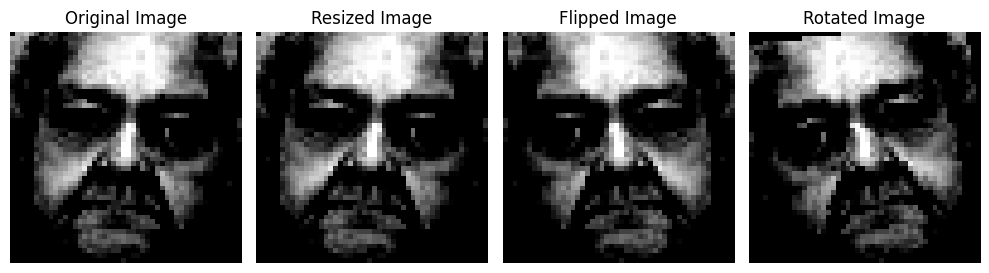

In [ ]:
images, labels = next(iter(train_iter))
image = images[0]


# Apply each transformation step individually and plot the image after each step
plt.figure(figsize=(10, 10))

# Original image
plt.subplot(141)
plt.imshow(image.permute(1, 2, 0))
plt.title('Original Image')
plt.axis('off')

# Resize
resized_image = transform_train.transforms[0](image)
plt.subplot(142)
plt.imshow(resized_image.permute(1, 2, 0))
plt.title('Resized Image')
plt.axis('off')

# Random horizontal flip
flipped_image = transform_train.transforms[1](resized_image)
plt.subplot(143)
plt.imshow(flipped_image.permute(1, 2, 0))
plt.title('Flipped Image')
plt.axis('off')

# Random rotation
rotated_image = transform_train.transforms[2](flipped_image)
plt.subplot(144)
plt.imshow(rotated_image.permute(1, 2, 0))
plt.title('Rotated Image')
plt.axis('off')

plt.tight_layout();
plt.show();


### This is an additional code to check the mean and standard deviation of your dataset - you can then use it to replace the values in transforms.Normalize to improve your work

In [ ]:
# means = torch.zeros(3)
# stds = torch.zeros(3)

# for img, label in train:
#     means += torch.mean(img, dim = (1,2))
#     stds += torch.std(img, dim = (1,2))

# means /= len(train)
# stds /= len(train)
    
# print(f'Calculated means: {means}')
# print(f'Calculated stds: {stds}')

### Show image - display some of your images for observation.

In [ ]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image    

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)
        
        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')

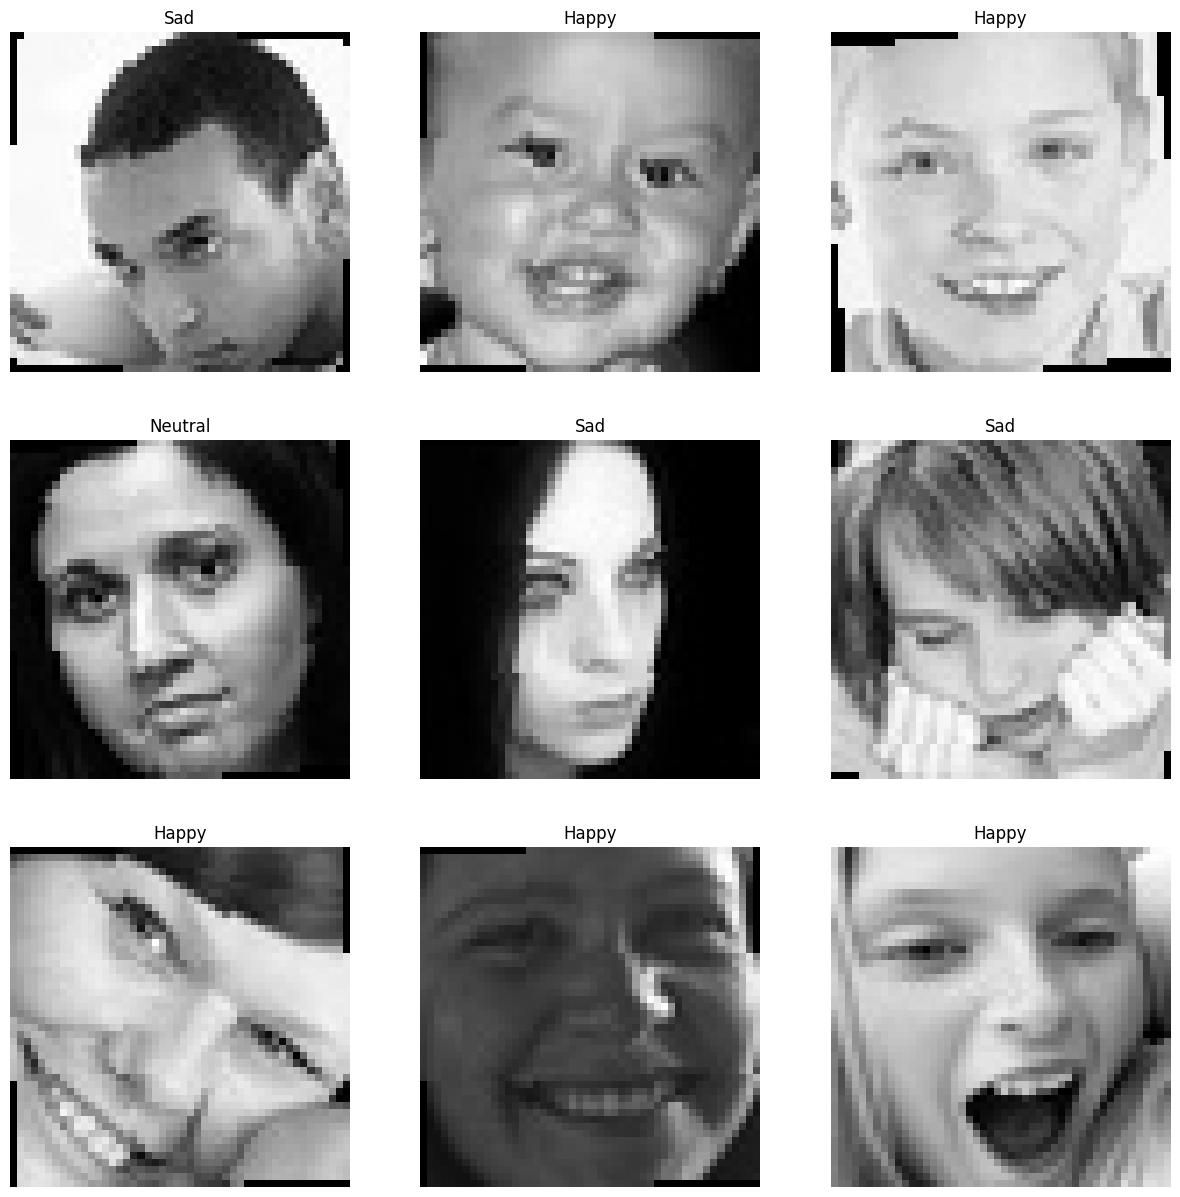

In [ ]:
N_IMAGES = 10

images, labels = next(iter(train_iter))
image_label_pairs = list(zip(images, labels))
random.shuffle(image_label_pairs)
shuffled_images, shuffled_labels = zip(*image_label_pairs)
classes = train.classes

plot_images(shuffled_images[:N_IMAGES], shuffled_labels[:N_IMAGES], classes)


# Define Baseline Model
Using `resnet50()` as baseline model

In [ ]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()
                
        block, n_blocks, channels = config
        self.in_channels = channels[0]
            
        assert len(n_blocks) == len(channels) == 4
        
        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        
        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)
        
    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):
    
        layers = []
        
        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False
        
        layers.append(block(self.in_channels, channels, stride, downsample))
        
        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels
            
        return nn.Sequential(*layers)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)
        
        return x, h

class BasicBlock(nn.Module):
    
    expansion = 1
    
    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()
                
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, 
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, 
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.relu = nn.ReLU(inplace = True)
        
        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1, 
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
        
        self.downsample = downsample
        
    def forward(self, x):
        
        i = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        
        if self.downsample is not None:
            i = self.downsample(i)
                        
        x += i
        x = self.relu(x)
        
        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):
    
    expansion = 4
    
    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()
    
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1, 
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, 
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)
        
        self.relu = nn.ReLU(inplace = True)
        
        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1, 
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None
            
        self.downsample = downsample
        
    def forward(self, x):
        
        i = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        
        x = self.conv3(x)
        x = self.bn3(x)
                
        if self.downsample is not None:
            i = self.downsample(i)
            
        x += i
        x = self.relu(x)
    
        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])

### HERE you can start to define your model, you can use different resnet for your work.

In [ ]:
pretrained_model = models.resnet50(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features 
OUTPUT_DIM = len(train.classes)

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
resnet_model = ResNet(resnet50_config, OUTPUT_DIM)
resnet_model.load_state_dict(pretrained_model.state_dict())

c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [ ]:
def count_parameters(model):
    return __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(resnet_model):,} trainable parameters')

The model has 23,514,179 trainable parameters


### Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
resnet_model = resnet_model.to(device)
criterion = criterion.to(device)

In [ ]:
FOUND_LR = 1e-3

params = [
          {'params': resnet_model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': resnet_model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': resnet_model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': resnet_model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': resnet_model.fc.parameters()}
         ]

# different optimizers
adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

#  First running the ResNet50 Model Using Adam optimizer 

In [ ]:
def changeepochs(epochs, opt):
    STEPS_PER_EPOCH = len(train_iter)
    TOTAL_STEPS = epochs * STEPS_PER_EPOCH

    MAX_LRS = [p['lr'] for p in opt.param_groups]

    scheduler = lr_scheduler.OneCycleLR(opt,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)
    return scheduler

In [ ]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [ ]:
def train_model(model, iterator, optimizer, criterion, device, scheduler=None ):
    
    epoch_loss = 0
    epoch_acc = 0

    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        y_pred, _ = model(x)
        
        loss = criterion(y_pred, y)
        
        acc = calculate_accuracy(y_pred, y)
        
        loss.backward()
        
        optimizer.step()
        if scheduler:
            scheduler.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)
        
    return epoch_loss, epoch_acc

In [ ]:
def evaluate(model, iterator, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0

    
    model.eval()
    
    with torch.no_grad():
        
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)
        
    return epoch_loss, epoch_acc

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
scheduler = changeepochs(100, adam_opt)

In [ ]:
def run_model(EPOCHS, model, opt, scheduler=None):
    counter = 0
    patience = 8
    best_valid_loss = float('inf')
    best_epoch = 0
    best_val_acc = float('inf')
    train_accs = []
    valid_accs = []
    train_losses = []
    valid_losses = []
    for epoch in range(EPOCHS):        
        start_time = time.monotonic()
        if scheduler:
            train_loss, train_acc = train_model(model, train_iter, opt, criterion, device, scheduler)
            valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break
        else:
            train_loss, train_acc = train_model(model, train_iter, opt, criterion, device)
            valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break

        

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        train_accs.append(train_acc)
        valid_accs.append(valid_acc)
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:6.2f}% |")
        print(f"\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:6.2f}% |")
    print(f"best epcoh: {best_epoch+1}, best _validation accuracy: {best_val_acc}, best Validation loss: {best_valid_loss}")
    return train_accs, valid_accs, train_losses, valid_losses

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_model(100, resnet_model, adam_opt, scheduler)

Epoch: 01 | Epoch Time: 1m 18s
	Train Loss: 0.973 | Train Acc:  52.66% |
	Valid Loss: 0.883 | Valid Acc:  59.46% |
Epoch: 02 | Epoch Time: 0m 46s
	Train Loss: 0.834 | Train Acc:  61.89% |
	Valid Loss: 0.803 | Valid Acc:  64.09% |
Epoch: 03 | Epoch Time: 0m 40s
	Train Loss: 0.755 | Train Acc:  65.65% |
	Valid Loss: 0.742 | Valid Acc:  66.28% |
Epoch: 04 | Epoch Time: 0m 41s
	Train Loss: 0.694 | Train Acc:  69.10% |
	Valid Loss: 0.714 | Valid Acc:  68.53% |
Epoch: 05 | Epoch Time: 0m 41s
	Train Loss: 0.651 | Train Acc:  71.96% |
	Valid Loss: 0.717 | Valid Acc:  69.11% |
Epoch: 06 | Epoch Time: 0m 42s
	Train Loss: 0.605 | Train Acc:  73.84% |
	Valid Loss: 0.681 | Valid Acc:  71.63% |
Epoch: 07 | Epoch Time: 0m 38s
	Train Loss: 0.570 | Train Acc:  75.68% |
	Valid Loss: 0.695 | Valid Acc:  71.08% |
Epoch: 08 | Epoch Time: 0m 39s
	Train Loss: 0.538 | Train Acc:  77.47% |
	Valid Loss: 0.676 | Valid Acc:  72.48% |
Epoch: 09 | Epoch Time: 0m 39s
	Train Loss: 0.498 | Train Acc:  79.60% |
	Valid 

In [ ]:
def plot_loss_acc():
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    ax[0].plot(train_losses, label='Training Loss')
    ax[0].plot(valid_losses, label='Validation Loss')
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].set_title("Train vs Validation Loss", weight="bold")
    ax[0].legend()

    ax[1].plot(train_accs, label='Training Accuracy')
    ax[1].plot(valid_accs, label='Validation Accuracy')
    ax[0].set_ylabel("Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[1].set_title("Train vs Validation Accuracy", weight="bold")
    ax[1].legend();
    plt.show()

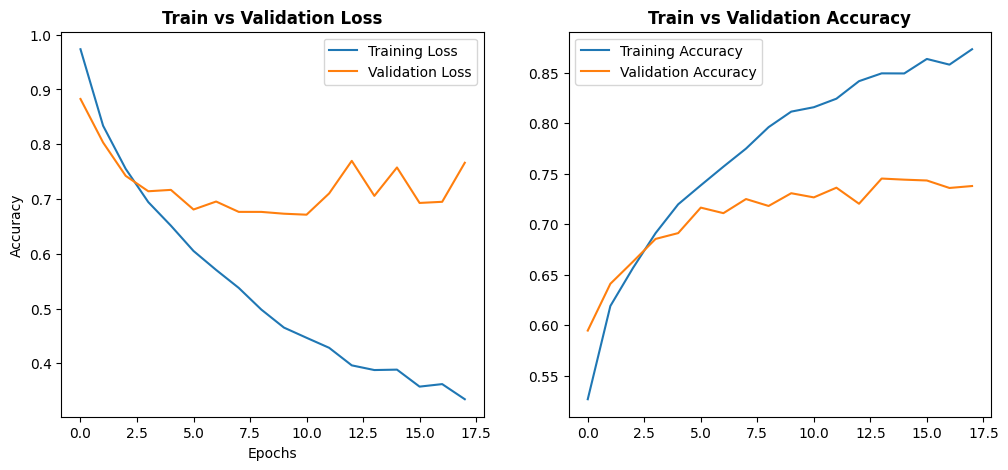

In [ ]:
plot_loss_acc()

In [ ]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

In [ ]:
images, labels, probs = get_predictions(resnet_model, test_iter)
test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
y_test = np.array(test.drop(['id'], axis=1))

In [ ]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]

In [ ]:
from scipy import interp
def plot_roc_curves(y_test, probs, class_labels):
    n_classes = len(class_labels)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i, label in enumerate(class_labels):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label='ROC curve of {0} (area = {1:0.2f})'
                 ''.format(label, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves of Proposed Method')
    plt.legend(loc="lower right")
    plt.show()


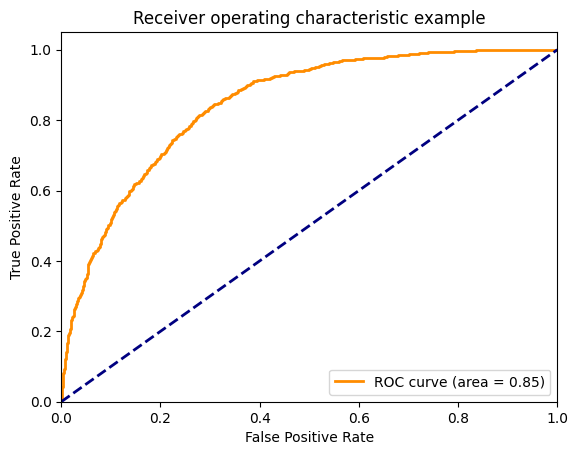

C:\Users\kings\AppData\Local\Temp\ipykernel_17132\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


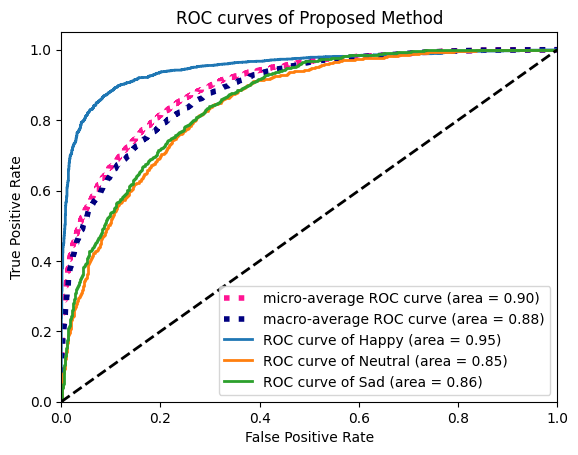

In [ ]:
plot_roc_curves(y_test, probs, class_names)

In [ ]:
def plot_cm_class_report():
    cm=confusion_matrix(true_class, pred_class)
    class_names = unique_labels(true_class, pred_class)
    class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
    class_names = [class_dict[label] for label in class_names]
    print(cm)
    print(class_names)

    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)

    C = cm
    divisor = np.zeros((3,3))
    divisor[0][:] = 1588
    divisor[1][:] = 1049
    divisor[2][:] = 1040
    cm_normalised=np.divide(cm, divisor)
    print(np.transpose(C.sum(axis=1)))
    print(divisor)
    cm_normalised = np.round(cm_normalised, 2)
    disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='');
    print(classification_report(true_class, pred_class))

[[1315  155  118]
 [  74  719  256]
 [  54  347  639]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1588
           1       0.59      0.69      0.63      1049
           2       0.63      0.61      0.62      1040

    accuracy                           0.73      3677
   macro avg       0.71      0.71      0.71      3677
weighted avg       0.74      0.73      0.73      3677



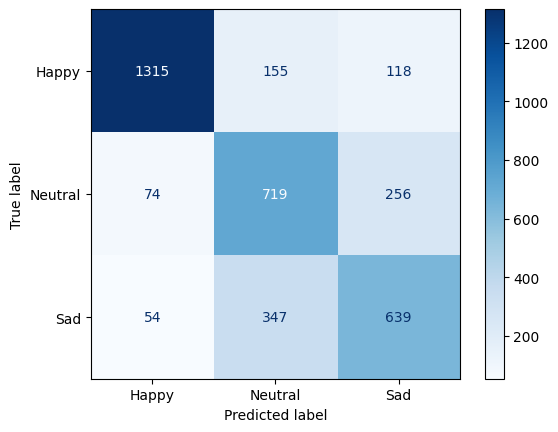

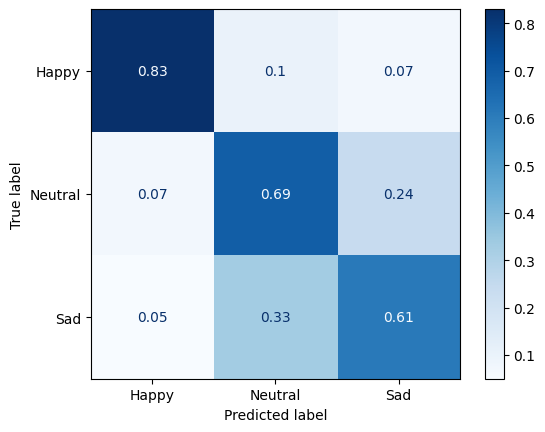

In [ ]:
plot_cm_class_report()

#  First running the ResNet50 Model Using SGD optimizer 

In [ ]:
pretrained_model = models.resnet50(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features 
OUTPUT_DIM = len(train.classes)

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
resnet_model1 = ResNet(resnet50_config, OUTPUT_DIM)
resnet_model1.load_state_dict(pretrained_model.state_dict())

c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

### Setting the hyperparameters and train the model

In [ ]:
criterion = nn.CrossEntropyLoss()
resnet_model1 = resnet_model1.to(device)
criterion = criterion.to(device)

In [ ]:
FOUND_LR = 1e-3

params = [
          {'params': resnet_model1.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model1.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model1.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': resnet_model1.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': resnet_model1.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': resnet_model1.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': resnet_model1.fc.parameters()}
         ]

# different optimizers
# adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler = changeepochs(100, sgd)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_model(100, resnet_model1, sgd, scheduler)

Epoch: 01 | Epoch Time: 1m 9s
	Train Loss: 1.066 | Train Acc:  43.48% |
	Valid Loss: 1.033 | Valid Acc:  47.51% |
Epoch: 02 | Epoch Time: 0m 41s
	Train Loss: 1.006 | Train Acc:  49.92% |
	Valid Loss: 0.992 | Valid Acc:  51.29% |
Epoch: 03 | Epoch Time: 0m 40s
	Train Loss: 0.973 | Train Acc:  52.57% |
	Valid Loss: 0.967 | Valid Acc:  52.66% |
Epoch: 04 | Epoch Time: 0m 40s
	Train Loss: 0.943 | Train Acc:  54.91% |
	Valid Loss: 0.923 | Valid Acc:  56.17% |
Epoch: 05 | Epoch Time: 0m 41s
	Train Loss: 0.911 | Train Acc:  57.24% |
	Valid Loss: 0.899 | Valid Acc:  57.29% |
Epoch: 06 | Epoch Time: 0m 41s
	Train Loss: 0.879 | Train Acc:  59.17% |
	Valid Loss: 0.871 | Valid Acc:  58.80% |
Epoch: 07 | Epoch Time: 0m 42s
	Train Loss: 0.842 | Train Acc:  61.11% |
	Valid Loss: 0.829 | Valid Acc:  61.84% |
Epoch: 08 | Epoch Time: 0m 42s
	Train Loss: 0.806 | Train Acc:  63.63% |
	Valid Loss: 0.796 | Valid Acc:  63.93% |
Epoch: 09 | Epoch Time: 0m 40s
	Train Loss: 0.775 | Train Acc:  64.80% |
	Valid L

In [ ]:
images, labels, probs = get_predictions(resnet_model1, test_iter)
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]

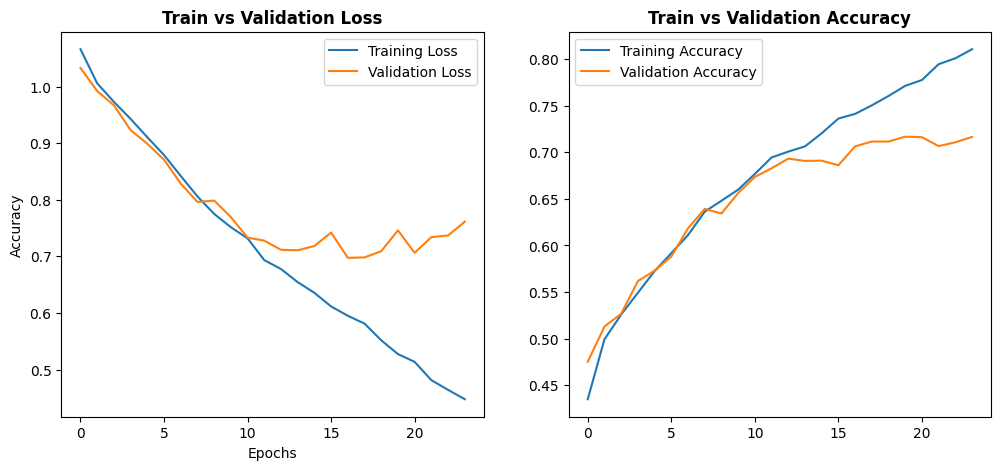

In [ ]:
plot_loss_acc()

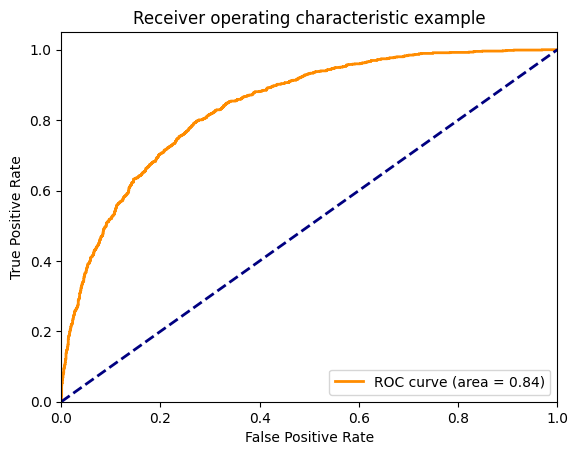

C:\Users\kings\AppData\Local\Temp\ipykernel_17132\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


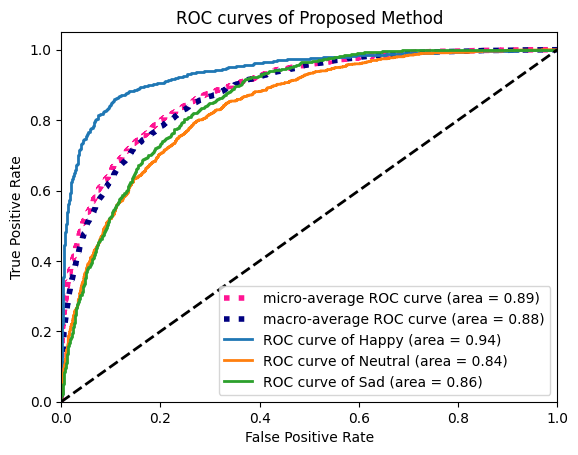

In [ ]:
plot_roc_curves(y_test, probs, class_names)

[[1388  122   78]
 [ 146  712  191]
 [ 132  365  543]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1588
           1       0.59      0.68      0.63      1049
           2       0.67      0.52      0.59      1040

    accuracy                           0.72      3677
   macro avg       0.70      0.69      0.69      3677
weighted avg       0.72      0.72      0.72      3677



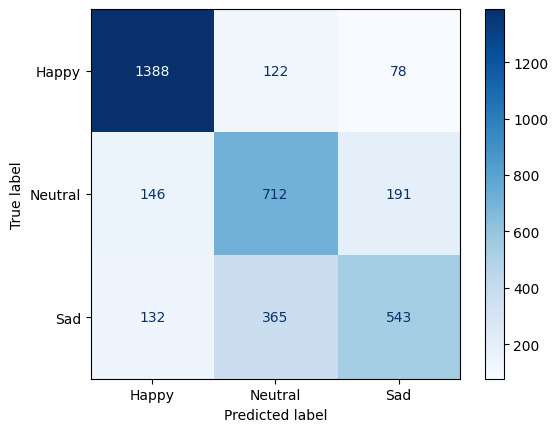

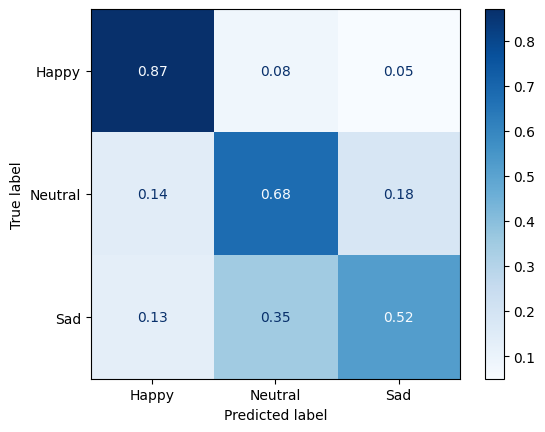

In [ ]:
plot_cm_class_report()

#  Using the ResNet50 Model Using SGD Nesterov optimizer 

In [ ]:
pretrained_model = models.resnet50(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features 
OUTPUT_DIM = len(train.classes)

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
resnet_model2 = ResNet(resnet50_config, OUTPUT_DIM)
resnet_model2.load_state_dict(pretrained_model.state_dict())

<All keys matched successfully>

### Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
resnet_model2 = resnet_model2.to(device)
criterion = criterion.to(device)

In [ ]:
FOUND_LR = 1e-3

params = [
          {'params': resnet_model2.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model2.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model2.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': resnet_model2.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': resnet_model2.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': resnet_model2.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': resnet_model2.fc.parameters()}
         ]

# different optimizers
# adam_opt = optim.Adam(params, lr=FOUND_LR)
# sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_model(100, resnet_model2, sgd_nesterov_opt)

Epoch: 01 | Epoch Time: 1m 0s
	Train Loss: 0.974 | Train Acc:  52.29% |
	Valid Loss: 0.932 | Valid Acc:  56.58% |
Epoch: 02 | Epoch Time: 0m 40s
	Train Loss: 0.823 | Train Acc:  62.45% |
	Valid Loss: 0.770 | Valid Acc:  65.30% |
Epoch: 03 | Epoch Time: 0m 42s
	Train Loss: 0.746 | Train Acc:  66.42% |
	Valid Loss: 0.750 | Valid Acc:  67.52% |
Epoch: 04 | Epoch Time: 0m 43s
	Train Loss: 0.689 | Train Acc:  69.03% |
	Valid Loss: 0.707 | Valid Acc:  69.54% |
Epoch: 05 | Epoch Time: 0m 43s
	Train Loss: 0.650 | Train Acc:  71.17% |
	Valid Loss: 0.695 | Valid Acc:  70.37% |
Epoch: 06 | Epoch Time: 0m 37s
	Train Loss: 0.609 | Train Acc:  73.72% |
	Valid Loss: 0.697 | Valid Acc:  70.18% |
Epoch: 07 | Epoch Time: 0m 41s
	Train Loss: 0.578 | Train Acc:  75.21% |
	Valid Loss: 0.694 | Valid Acc:  70.50% |
Epoch: 08 | Epoch Time: 0m 38s
	Train Loss: 0.557 | Train Acc:  76.17% |
	Valid Loss: 0.706 | Valid Acc:  71.24% |
Epoch: 09 | Epoch Time: 0m 33s
	Train Loss: 0.511 | Train Acc:  78.45% |
	Valid L

In [ ]:
images, labels, probs = get_predictions(resnet_model2, test_iter)
test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
y_test = np.array(test.drop(['id'], axis=1))
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]

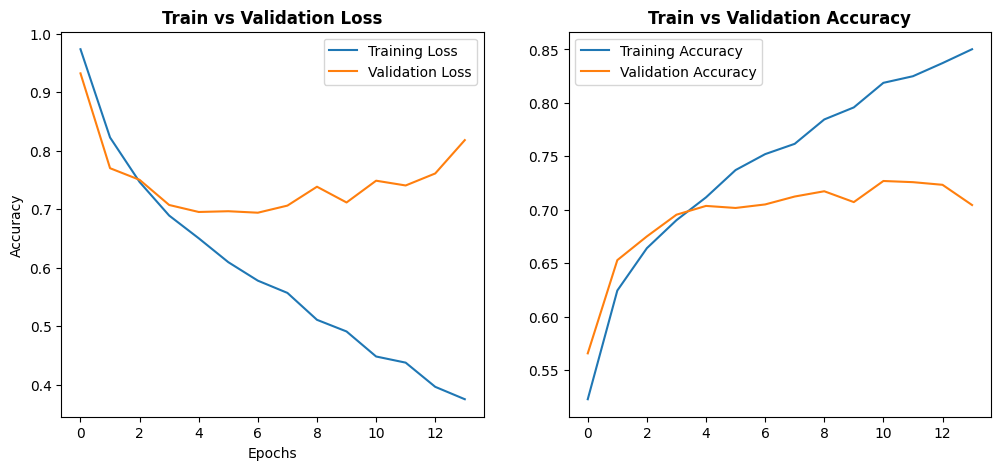

In [ ]:
plot_loss_acc()

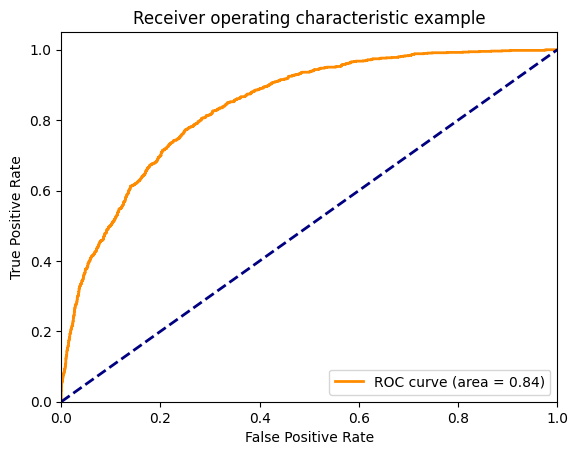

C:\Users\kings\AppData\Local\Temp\ipykernel_17592\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


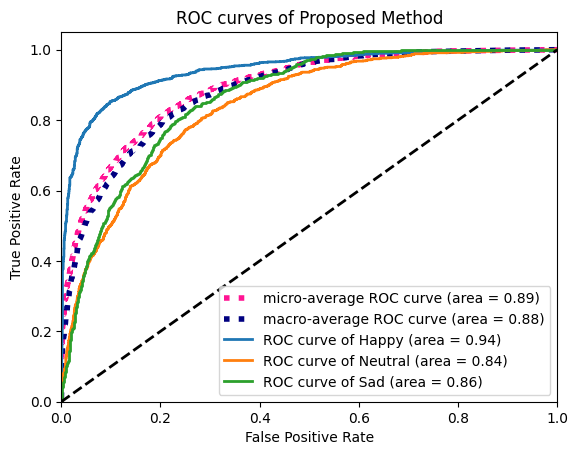

In [ ]:
plot_roc_curves(y_test, probs, class_names)

[[1382  108   98]
 [ 153  630  266]
 [ 119  269  652]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1588
           1       0.63      0.60      0.61      1049
           2       0.64      0.63      0.63      1040

    accuracy                           0.72      3677
   macro avg       0.70      0.70      0.70      3677
weighted avg       0.72      0.72      0.72      3677



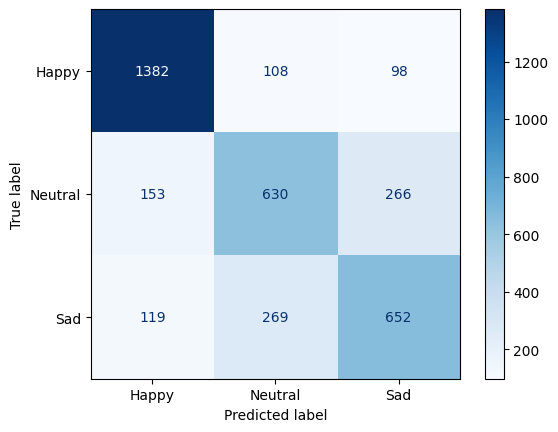

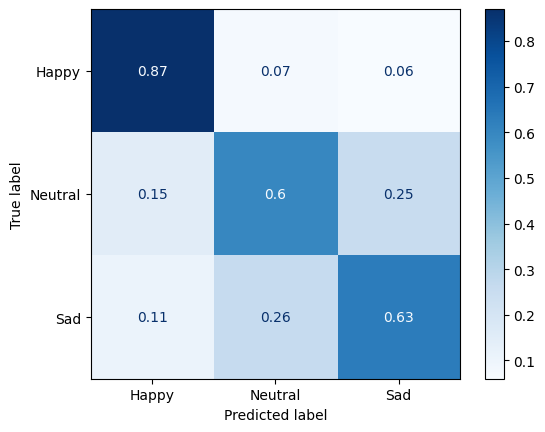

In [ ]:
plot_cm_class_report()

# Define VGG Model

In [ ]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

vgg34_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M',
                512, 512, 512, 'M', 512, 512, 512, 'M']



def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)

vgg11_layers = get_vgg_layers(vgg11_config, batch_norm=True)
#print(vgg11_layers)

# Using Adam optimizer

In [ ]:
OUTPUT_DIM = 3

vgg_model1 = VGG(vgg11_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg11_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Setting the hyperparameters and train the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
vgg_model1 = vgg_model1.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': vgg_model1.features.parameters(), 'lr': FOUND_LR / 10},
          {'params': vgg_model1.classifier.parameters()}
         ]
# different optimizers
adam_opt = optim.Adam(params, lr=FOUND_LR)
# sgd = optim.SGD(params, lr=FOUND_LR)
# sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_model(100, vgg_model1, adam_opt)

Epoch: 01 | Epoch Time: 1m 12s
	Train Loss: 1.922 | Train Acc:  45.04% |
	Valid Loss: 0.908 | Valid Acc:  53.84% |
Epoch: 02 | Epoch Time: 1m 0s
	Train Loss: 0.878 | Train Acc:  57.59% |
	Valid Loss: 0.812 | Valid Acc:  59.90% |
Epoch: 03 | Epoch Time: 1m 1s
	Train Loss: 0.814 | Train Acc:  61.48% |
	Valid Loss: 0.765 | Valid Acc:  65.65% |
Epoch: 04 | Epoch Time: 1m 3s
	Train Loss: 0.753 | Train Acc:  65.36% |
	Valid Loss: 0.738 | Valid Acc:  66.06% |
Epoch: 05 | Epoch Time: 1m 7s
	Train Loss: 0.718 | Train Acc:  67.80% |
	Valid Loss: 0.706 | Valid Acc:  67.16% |
Epoch: 06 | Epoch Time: 1m 1s
	Train Loss: 0.694 | Train Acc:  68.61% |
	Valid Loss: 0.829 | Valid Acc:  63.73% |
Epoch: 07 | Epoch Time: 1m 0s
	Train Loss: 0.660 | Train Acc:  71.04% |
	Valid Loss: 0.709 | Valid Acc:  68.56% |
Epoch: 08 | Epoch Time: 1m 8s
	Train Loss: 0.632 | Train Acc:  72.41% |
	Valid Loss: 0.675 | Valid Acc:  70.81% |
Epoch: 09 | Epoch Time: 1m 1s
	Train Loss: 0.620 | Train Acc:  73.43% |
	Valid Loss: 0.

In [ ]:
images, labels, probs = get_predictions(vgg_model1, test_iter)
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]

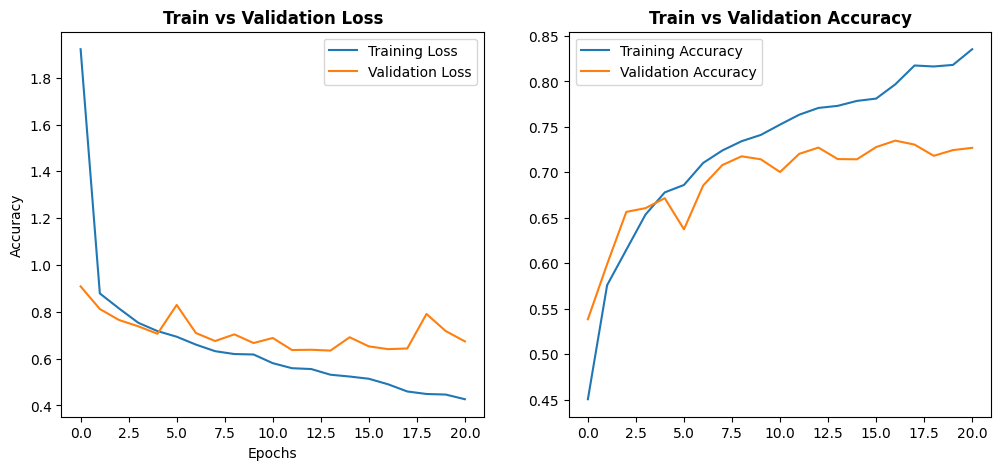

In [ ]:
plot_loss_acc()

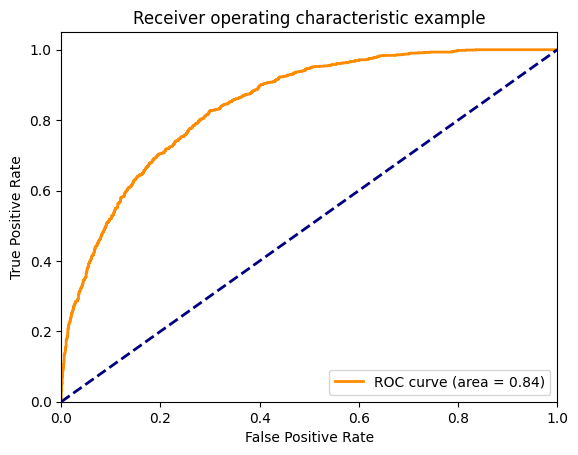

C:\Users\kings\AppData\Local\Temp\ipykernel_17592\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


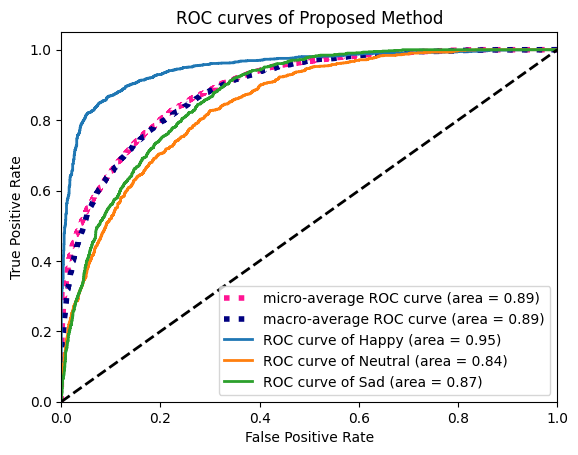

In [ ]:
plot_roc_curves(y_test, probs, class_names)

[[1460   94   34]
 [ 192  723  134]
 [ 179  394  467]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1588
           1       0.60      0.69      0.64      1049
           2       0.74      0.45      0.56      1040

    accuracy                           0.72      3677
   macro avg       0.71      0.69      0.68      3677
weighted avg       0.72      0.72      0.71      3677



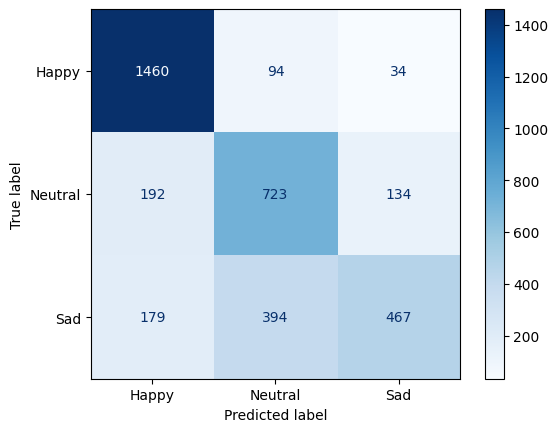

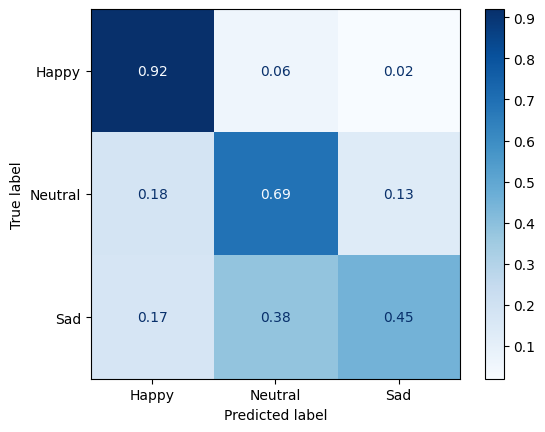

In [ ]:
plot_cm_class_report()

# Using SGD Optimizer

In [ ]:
OUTPUT_DIM = 3

vgg_model2 = VGG(vgg11_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg11_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Setting the hyperparameters and train the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

vgg_model2 = vgg_model2.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': vgg_model2.features.parameters(), 'lr': FOUND_LR / 10},
          {'params': vgg_model2.classifier.parameters()}
         ]
# different optimizers
# adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
# sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_model(100, vgg_model2, sgd)

Epoch: 01 | Epoch Time: 0m 59s
	Train Loss: 1.082 | Train Acc:  41.97% |
	Valid Loss: 1.055 | Valid Acc:  44.85% |
Epoch: 02 | Epoch Time: 0m 36s
	Train Loss: 1.066 | Train Acc:  44.20% |
	Valid Loss: 1.044 | Valid Acc:  47.12% |
Epoch: 03 | Epoch Time: 0m 36s
	Train Loss: 1.048 | Train Acc:  46.12% |
	Valid Loss: 1.025 | Valid Acc:  47.86% |
Epoch: 04 | Epoch Time: 0m 37s
	Train Loss: 1.031 | Train Acc:  46.97% |
	Valid Loss: 1.004 | Valid Acc:  50.69% |
Epoch: 05 | Epoch Time: 0m 38s
	Train Loss: 1.009 | Train Acc:  48.77% |
	Valid Loss: 0.976 | Valid Acc:  52.25% |
Epoch: 06 | Epoch Time: 0m 38s
	Train Loss: 0.984 | Train Acc:  51.04% |
	Valid Loss: 0.945 | Valid Acc:  54.82% |
Epoch: 07 | Epoch Time: 0m 39s
	Train Loss: 0.953 | Train Acc:  53.11% |
	Valid Loss: 0.921 | Valid Acc:  56.61% |
Epoch: 08 | Epoch Time: 0m 42s
	Train Loss: 0.931 | Train Acc:  55.56% |
	Valid Loss: 0.902 | Valid Acc:  57.70% |
Epoch: 09 | Epoch Time: 0m 43s
	Train Loss: 0.897 | Train Acc:  57.35% |
	Valid 

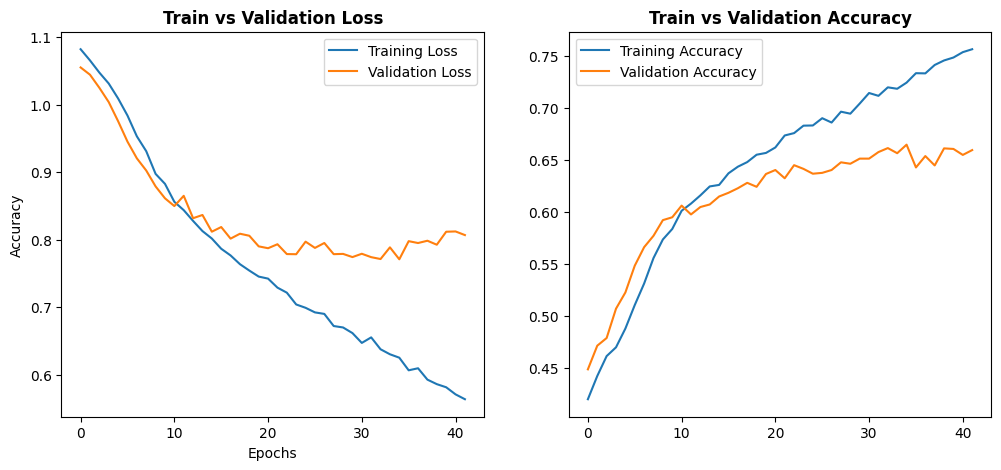

In [ ]:
plot_loss_acc()

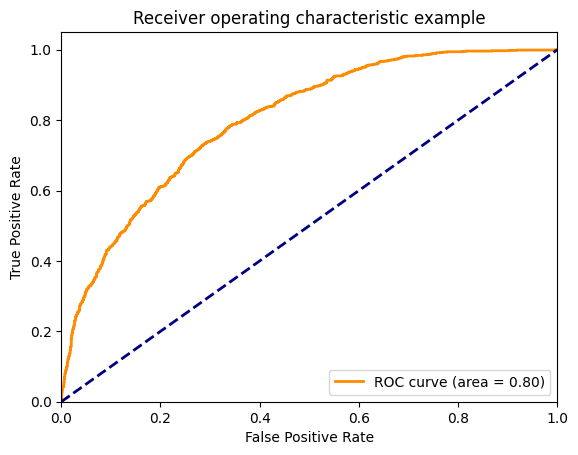

C:\Users\kings\AppData\Local\Temp\ipykernel_14516\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


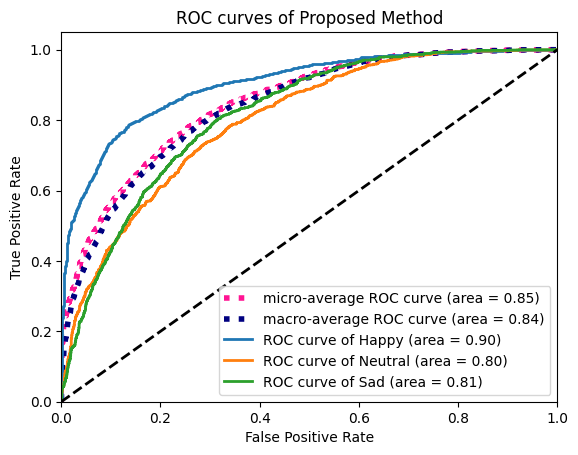

In [ ]:
images, labels, probs = get_predictions(vgg_model2, test_iter)
test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
y_test = np.array(test.drop(['id'], axis=1))
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]
plot_roc_curves(y_test, probs, class_names)

[[1321  154  113]
 [ 222  618  209]
 [ 186  343  511]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1588
           1       0.55      0.59      0.57      1049
           2       0.61      0.49      0.55      1040

    accuracy                           0.67      3677
   macro avg       0.64      0.64      0.64      3677
weighted avg       0.66      0.67      0.66      3677



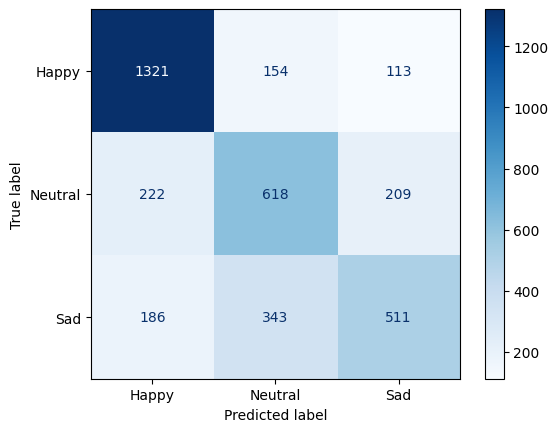

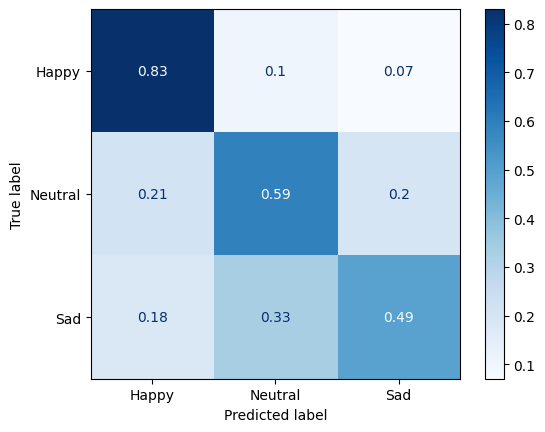

In [ ]:
plot_cm_class_report()

In [ ]:
OUTPUT_DIM = 3

vgg_model3 = VGG(vgg11_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg11_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\kings\miniconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# Setting the hyperparameters and train the model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

vgg_model3 = vgg_model3.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': vgg_model3.features.parameters(), 'lr': FOUND_LR / 10},
          {'params': vgg_model3.classifier.parameters()}
         ]
# different optimizers
# adam_opt = optim.Adam(params, lr=FOUND_LR)
# sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_model(100, vgg_model3, sgd_nesterov_opt)

Epoch: 01 | Epoch Time: 1m 0s
	Train Loss: 1.098 | Train Acc:  41.71% |
	Valid Loss: 0.985 | Valid Acc:  51.48% |
Epoch: 02 | Epoch Time: 0m 44s
	Train Loss: 0.953 | Train Acc:  53.28% |
	Valid Loss: 0.882 | Valid Acc:  57.65% |
Epoch: 03 | Epoch Time: 0m 39s
	Train Loss: 0.850 | Train Acc:  59.63% |
	Valid Loss: 0.814 | Valid Acc:  61.73% |
Epoch: 04 | Epoch Time: 0m 40s
	Train Loss: 0.789 | Train Acc:  63.09% |
	Valid Loss: 0.780 | Valid Acc:  63.62% |
Epoch: 05 | Epoch Time: 0m 42s
	Train Loss: 0.753 | Train Acc:  65.32% |
	Valid Loss: 0.760 | Valid Acc:  64.78% |
Epoch: 06 | Epoch Time: 0m 42s
	Train Loss: 0.723 | Train Acc:  67.42% |
	Valid Loss: 0.757 | Valid Acc:  64.75% |
Epoch: 07 | Epoch Time: 0m 41s
	Train Loss: 0.694 | Train Acc:  69.15% |
	Valid Loss: 0.744 | Valid Acc:  65.90% |
Epoch: 08 | Epoch Time: 0m 47s
	Train Loss: 0.664 | Train Acc:  70.40% |
	Valid Loss: 0.749 | Valid Acc:  66.34% |
Epoch: 09 | Epoch Time: 0m 49s
	Train Loss: 0.645 | Train Acc:  71.28% |
	Valid L

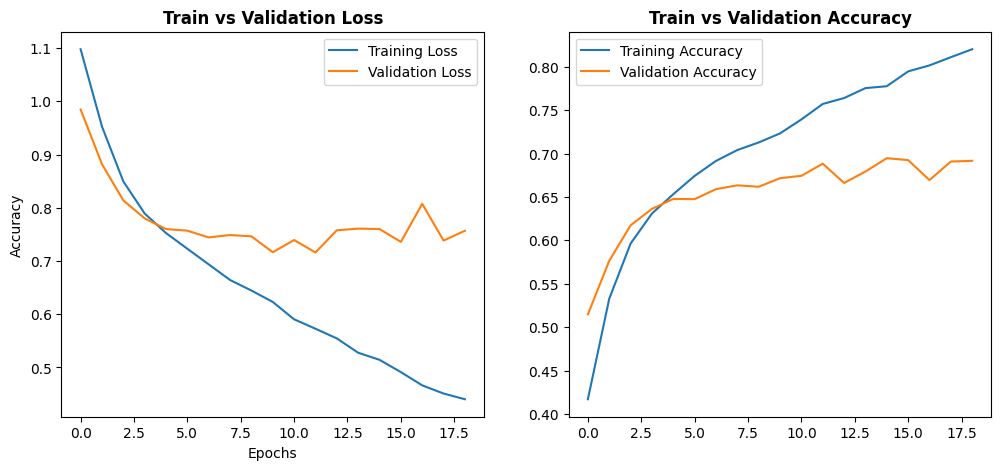

In [ ]:
plot_loss_acc()

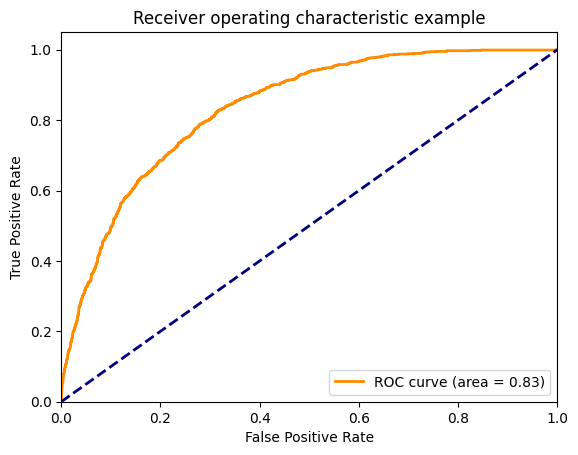

C:\Users\kings\AppData\Local\Temp\ipykernel_12220\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


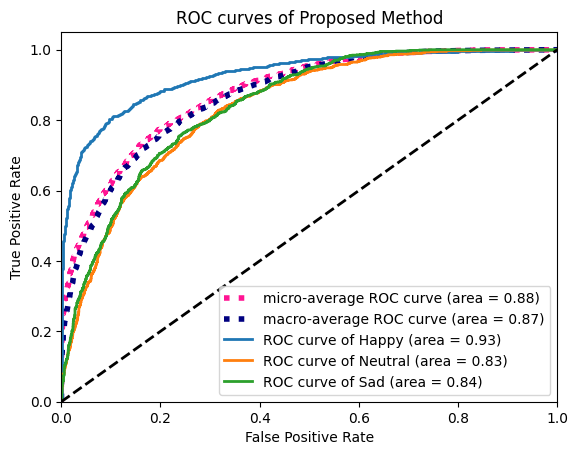

In [ ]:
images, labels, probs = get_predictions(vgg_model3, test_iter)
# test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
# y_test = np.array(test.drop(['id'], axis=1))
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]
plot_roc_curves(y_test, probs, class_names)

[[1355   90  143]
 [ 181  555  313]
 [ 146  202  692]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1588
           1       0.66      0.53      0.59      1049
           2       0.60      0.67      0.63      1040

    accuracy                           0.71      3677
   macro avg       0.69      0.68      0.68      3677
weighted avg       0.71      0.71      0.70      3677



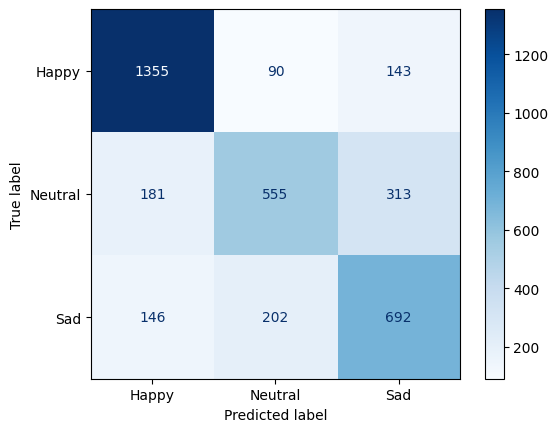

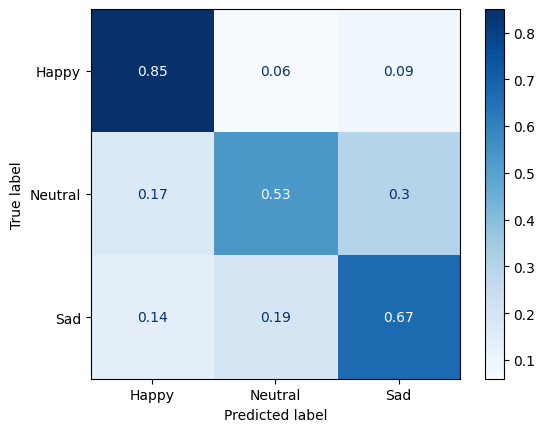

In [ ]:
plot_cm_class_report()

# Self Architecture

In [ ]:
images, labels = next(iter(train_iter))

To calculate the output size 
$$
\frac{W -F + 2P} S + 1
$$

where:

      W = width of input

      F = filter size

      P = padding  
      
      S = stride

### Starting the architecture with 1 convolution layer + Maxpooling and 2 fully connected layer

In [ ]:
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5,padding=1)
pool = nn.MaxPool2d(kernel_size=2, stride=2)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([32, 32, 46, 46])
torch.Size([32, 32, 23, 23])


In [ ]:
class DeboNet(nn.Module):
    def __init__(self):
        super(DeboNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # fully connected layers 
        self.fc1 = nn.Linear(in_features=32*23*23, out_features=4096) # first fully connected layer
        self.out = nn.Linear(in_features=4096, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [ ]:
debo = DeboNet()
debo

DeboNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16928, out_features=4096, bias=True)
  (out): Linear(in_features=4096, out_features=3, bias=True)
)

In [ ]:
def count_parameters(model):
    return  __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(debo):,} trainable parameters')

The model has 69,355,907 trainable parameters


### Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
debo = debo.to(device)
criterion = criterion.to(device)

In [ ]:
FOUND_LR = 1e-3

params = [
          {'params': debo.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': debo.fc1.parameters(), 'lr': FOUND_LR / 5},
          {'params': debo.out.parameters()}
          ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler = changeepochs(100, adam_opt)

In [ ]:
def train_self(model, iterator, optimizer, criterion, device, scheduler=None):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for (x, y) in iterator:
        
        x = x.to(device)
        y = y.to(device)
        
        optimizer.zero_grad()
                
        y_pred = model(x)
        
        loss = criterion(y_pred, y)
        
        acc = calculate_accuracy(y_pred, y)
        
        loss.backward()
        
        optimizer.step()
        if scheduler:
            scheduler.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)
        
    return epoch_loss, epoch_acc

In [ ]:
def evaluate_self(model, iterator, criterion, device):
    
    epoch_loss = 0
    epoch_acc = 0

    
    model.eval()
    
    with torch.no_grad():
        
        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)
        
    return epoch_loss, epoch_acc

In [ ]:
def get_predictions_self(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

In [ ]:
def run_self_model(EPOCHS, model, opt, scheduler=None):
    counter = 0
    patience = 8
    best_valid_loss = float('inf')
    best_epoch = 0
    best_val_acc = float('inf')
    train_accs = []
    valid_accs = []
    train_losses = []
    valid_losses = []
    for epoch in range(EPOCHS):        
        start_time = time.monotonic()
        if scheduler:
            train_loss, train_acc = train_self(model, train_iter, opt, criterion, device, scheduler)
            valid_loss, valid_acc = evaluate_self(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break
        else:
            train_loss, train_acc = train_self(model, train_iter, opt, criterion, device)
            valid_loss, valid_acc = evaluate_self(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break

        

        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        train_accs.append(train_acc)
        valid_accs.append(valid_acc)
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:6.2f}% |")
        print(f"\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:6.2f}% |")
    print(f"best epcoh: {best_epoch+1}, best _validation accuracy: {best_val_acc}, best Validation loss: {best_valid_loss}")
    return train_accs, valid_accs, train_losses, valid_losses

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(100, debo, adam_opt, scheduler)

Epoch: 01 | Epoch Time: 0m 46s
	Train Loss: 0.986 | Train Acc:  51.68% |
	Valid Loss: 0.972 | Valid Acc:  53.84% |
Epoch: 02 | Epoch Time: 0m 27s
	Train Loss: 0.911 | Train Acc:  57.22% |
	Valid Loss: 0.888 | Valid Acc:  58.85% |
Epoch: 03 | Epoch Time: 0m 25s
	Train Loss: 0.884 | Train Acc:  59.06% |
	Valid Loss: 0.869 | Valid Acc:  59.81% |
Epoch: 04 | Epoch Time: 0m 25s
	Train Loss: 0.871 | Train Acc:  59.68% |
	Valid Loss: 0.890 | Valid Acc:  57.70% |
Epoch: 05 | Epoch Time: 0m 26s
	Train Loss: 0.841 | Train Acc:  60.76% |
	Valid Loss: 0.874 | Valid Acc:  59.24% |
Epoch: 06 | Epoch Time: 0m 26s
	Train Loss: 0.828 | Train Acc:  61.52% |
	Valid Loss: 0.820 | Valid Acc:  61.24% |
Epoch: 07 | Epoch Time: 0m 25s
	Train Loss: 0.827 | Train Acc:  61.37% |
	Valid Loss: 0.864 | Valid Acc:  58.69% |
Epoch: 08 | Epoch Time: 0m 27s
	Train Loss: 0.803 | Train Acc:  63.47% |
	Valid Loss: 0.800 | Valid Acc:  62.31% |
Epoch: 09 | Epoch Time: 0m 27s
	Train Loss: 0.800 | Train Acc:  63.64% |
	Valid 

### Starting the architecture with 1 convolution layer + Maxpooling and 3 fully connected layer

In [ ]:
class DeboNet(nn.Module):
    def __init__(self):
        super(DeboNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # fully connected layers 
        self.fc1 = nn.Linear(in_features=32*23*23, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
debo = DeboNet()
debo

DeboNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16928, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
def count_parameters(model):
    return  __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(debo):,} trainable parameters')

The model has 71,442,819 trainable parameters


### Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
debo = debo.to(device)
criterion = criterion.to(device)

In [ ]:
FOUND_LR = 1e-3

params = [
          {'params': debo.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': debo.fc1.parameters(), 'lr': FOUND_LR / 8},
          {'params': debo.fc2.parameters(), 'lr': FOUND_LR / 6},
          {'params': debo.out.parameters()}
          ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler = changeepochs(100, adam_opt)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(100, debo, adam_opt, scheduler)

Epoch: 01 | Epoch Time: 0m 37s
	Train Loss: 1.071 | Train Acc:  43.37% |
	Valid Loss: 1.055 | Valid Acc:  45.39% |
Epoch: 02 | Epoch Time: 0m 28s
	Train Loss: 1.027 | Train Acc:  48.16% |
	Valid Loss: 0.991 | Valid Acc:  53.15% |
Epoch: 03 | Epoch Time: 0m 26s
	Train Loss: 0.954 | Train Acc:  55.21% |
	Valid Loss: 0.933 | Valid Acc:  55.73% |
Epoch: 04 | Epoch Time: 0m 26s
	Train Loss: 0.908 | Train Acc:  57.93% |
	Valid Loss: 0.907 | Valid Acc:  58.47% |
Epoch: 05 | Epoch Time: 0m 26s
	Train Loss: 0.869 | Train Acc:  60.17% |
	Valid Loss: 0.869 | Valid Acc:  60.06% |
Epoch: 06 | Epoch Time: 0m 26s
	Train Loss: 0.836 | Train Acc:  61.76% |
	Valid Loss: 0.860 | Valid Acc:  59.73% |
Epoch: 07 | Epoch Time: 0m 29s
	Train Loss: 0.810 | Train Acc:  63.19% |
	Valid Loss: 0.849 | Valid Acc:  60.22% |
Epoch: 08 | Epoch Time: 0m 27s
	Train Loss: 0.785 | Train Acc:  65.00% |
	Valid Loss: 0.878 | Valid Acc:  58.91% |
Epoch: 09 | Epoch Time: 0m 26s
	Train Loss: 0.758 | Train Acc:  66.41% |
	Valid 

### Adding a second convolutional layers + pooling layer

In [ ]:
images, labels = next(iter(train_iter))
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5,padding=1)
pool = nn.MaxPool2d(kernel_size=2, stride=2)
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([32, 32, 46, 46])
torch.Size([32, 32, 23, 23])
torch.Size([32, 64, 21, 21])
torch.Size([32, 64, 10, 10])


In [ ]:
class DeboNet(nn.Module):
    def __init__(self):
        super(DeboNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
        
        # fully connected layers 
        self.fc1 = nn.Linear(in_features=64*10*10, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
debo = DeboNet()
debo

DeboNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
def count_parameters(model):
    return  __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(debo):,} trainable parameters')

The model has 28,371,395 trainable parameters


### Setting the hyperparameters and train the model

In [ ]:
criterion = nn.CrossEntropyLoss()
debo = debo.to(device)
criterion = criterion.to(device)

In [ ]:
FOUND_LR = 1e-3

params = [
          {'params': debo.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': debo.conv2.parameters(), 'lr': FOUND_LR / 10},
          {'params': debo.fc1.parameters(), 'lr': FOUND_LR / 6},
          {'params': debo.fc2.parameters(), 'lr': FOUND_LR / 4},
          {'params': debo.out.parameters(), 'lr': FOUND_LR / 2},
          ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler = changeepochs(1100 adam_opt)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(100, debo, adam_opt, scheduler)

Epoch: 01 | Epoch Time: 0m 41s
	Train Loss: 1.030 | Train Acc:  47.55% |
	Valid Loss: 0.943 | Valid Acc:  54.77% |
Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 0.912 | Train Acc:  56.42% |
	Valid Loss: 0.858 | Valid Acc:  59.35% |
Epoch: 03 | Epoch Time: 0m 16s
	Train Loss: 0.831 | Train Acc:  60.46% |
	Valid Loss: 0.833 | Valid Acc:  60.96% |
Epoch: 04 | Epoch Time: 0m 15s
	Train Loss: 0.768 | Train Acc:  64.09% |
	Valid Loss: 0.802 | Valid Acc:  62.20% |
Epoch: 05 | Epoch Time: 0m 15s
	Train Loss: 0.699 | Train Acc:  68.31% |
	Valid Loss: 0.790 | Valid Acc:  64.06% |
Epoch: 06 | Epoch Time: 0m 16s
	Train Loss: 0.615 | Train Acc:  73.30% |
	Valid Loss: 0.775 | Valid Acc:  66.26% |
Epoch: 07 | Epoch Time: 0m 16s
	Train Loss: 0.512 | Train Acc:  79.42% |
	Valid Loss: 0.781 | Valid Acc:  66.97% |
Epoch: 08 | Epoch Time: 0m 15s
	Train Loss: 0.386 | Train Acc:  85.40% |
	Valid Loss: 0.859 | Valid Acc:  66.91% |
Epoch: 09 | Epoch Time: 0m 15s
	Train Loss: 0.267 | Train Acc:  90.52% |
	Valid 

Adding a second layer with Padding=1 improved the valid loss and accuracy 

### Adding batchnormlization after the first convolution layer

In [ ]:
class DeboNet(nn.Module):
    def __init__(self):
        super(DeboNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
        
        # fully connected layers 
        self.fc1 = nn.Linear(in_features=64*10*10, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn1(x))
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
debo = DeboNet()
debo

DeboNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
print(f'The model has {count_parameters(debo):,} trainable parameters')

The model has 28,371,459 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
debo = debo.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
        {'params': debo.conv1.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.conv2.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.bn1.parameters(), 'lr': FOUND_LR / 8},
        {'params': debo.fc1.parameters(), 'lr': FOUND_LR / 6},
        {'params': debo.fc2.parameters(), 'lr': FOUND_LR / 4},
        {'params': debo.out.parameters(), 'lr': FOUND_LR / 2},
        ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler =  changeepochs(100, adam_opt)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(100, debo, adam_opt, scheduler)

Epoch: 01 | Epoch Time: 0m 22s
	Train Loss: 1.005 | Train Acc:  49.67% |
	Valid Loss: 0.972 | Valid Acc:  54.50% |
Epoch: 02 | Epoch Time: 0m 24s
	Train Loss: 0.874 | Train Acc:  59.04% |
	Valid Loss: 0.846 | Valid Acc:  59.21% |
Epoch: 03 | Epoch Time: 0m 24s
	Train Loss: 0.788 | Train Acc:  63.80% |
	Valid Loss: 0.772 | Valid Acc:  64.12% |
Epoch: 04 | Epoch Time: 0m 28s
	Train Loss: 0.716 | Train Acc:  67.92% |
	Valid Loss: 0.756 | Valid Acc:  65.76% |
Epoch: 05 | Epoch Time: 0m 31s
	Train Loss: 0.645 | Train Acc:  71.94% |
	Valid Loss: 0.782 | Valid Acc:  63.76% |
Epoch: 06 | Epoch Time: 0m 34s
	Train Loss: 0.553 | Train Acc:  76.34% |
	Valid Loss: 0.774 | Valid Acc:  67.00% |
Epoch: 07 | Epoch Time: 0m 29s
	Train Loss: 0.429 | Train Acc:  83.00% |
	Valid Loss: 0.783 | Valid Acc:  67.71% |
Epoch: 08 | Epoch Time: 0m 29s
	Train Loss: 0.293 | Train Acc:  89.35% |
	Valid Loss: 0.911 | Valid Acc:  66.09% |
Epoch: 09 | Epoch Time: 0m 27s
	Train Loss: 0.184 | Train Acc:  93.76% |
	Valid 

### Adding batchnormlization affter 2nd concolutional layer

In [ ]:
class DeboNet(nn.Module):
    def __init__(self):
        super(DeboNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        
        # fully connected layers 
        self.fc1 = nn.Linear(in_features=64*10*10, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn1(x))
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn2(x))
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
debo = DeboNet()
debo

DeboNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
print(f'The model has {count_parameters(debo):,} trainable parameters')

The model has 28,371,587 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
debo = debo.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
        {'params': debo.conv1.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.conv2.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.bn1.parameters(), 'lr': FOUND_LR / 8},
        {'params': debo.bn2.parameters(), 'lr': FOUND_LR / 6},
        {'params': debo.fc1.parameters(), 'lr': FOUND_LR / 4},
        {'params': debo.fc2.parameters(), 'lr': FOUND_LR / 2},
        {'params': debo.out.parameters()}
        ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler =  changeepochs(100, adam_opt)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(100, debo, adam_opt, scheduler)

Epoch: 01 | Epoch Time: 0m 24s
	Train Loss: 0.995 | Train Acc:  50.92% |
	Valid Loss: 0.925 | Valid Acc:  55.87% |
Epoch: 02 | Epoch Time: 0m 18s
	Train Loss: 0.887 | Train Acc:  58.77% |
	Valid Loss: 0.866 | Valid Acc:  59.21% |
Epoch: 03 | Epoch Time: 0m 17s
	Train Loss: 0.837 | Train Acc:  61.96% |
	Valid Loss: 0.851 | Valid Acc:  59.73% |
Epoch: 04 | Epoch Time: 0m 17s
	Train Loss: 0.794 | Train Acc:  63.96% |
	Valid Loss: 0.840 | Valid Acc:  60.06% |
Epoch: 05 | Epoch Time: 0m 18s
	Train Loss: 0.758 | Train Acc:  65.63% |
	Valid Loss: 0.815 | Valid Acc:  61.68% |
Epoch: 06 | Epoch Time: 0m 18s
	Train Loss: 0.724 | Train Acc:  68.16% |
	Valid Loss: 0.821 | Valid Acc:  62.23% |
Epoch: 07 | Epoch Time: 0m 18s
	Train Loss: 0.689 | Train Acc:  70.01% |
	Valid Loss: 0.880 | Valid Acc:  60.58% |
Epoch: 08 | Epoch Time: 0m 18s
	Train Loss: 0.653 | Train Acc:  71.80% |
	Valid Loss: 0.809 | Valid Acc:  62.80% |
Epoch: 09 | Epoch Time: 0m 18s
	Train Loss: 0.614 | Train Acc:  73.77% |
	Valid 

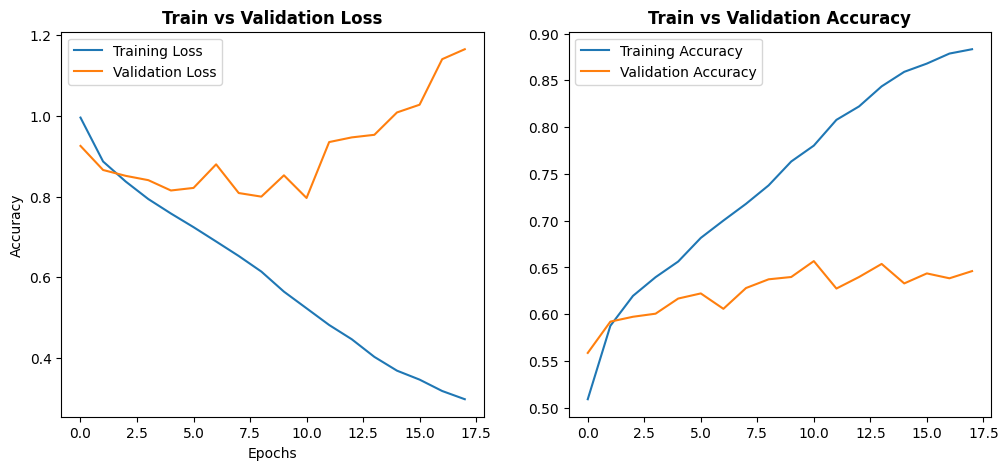

In [ ]:
plot_loss_acc()

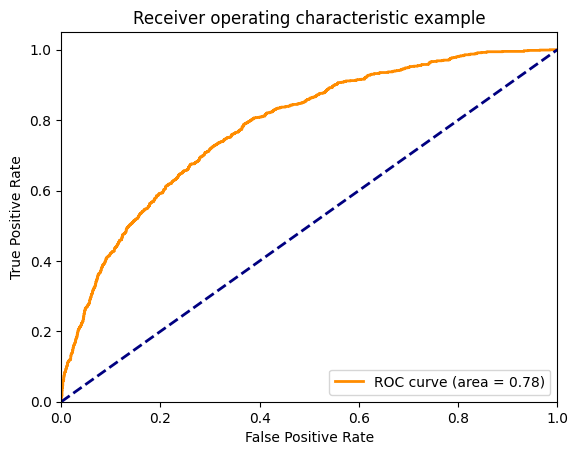

C:\Users\kings\AppData\Local\Temp\ipykernel_12220\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


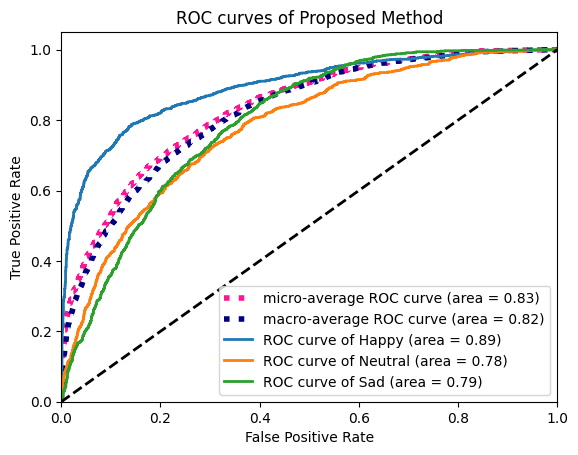

In [ ]:
images, labels, probs = get_predictions_self(debo, test_iter)
test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
y_test = np.array(test.drop(['id'], axis=1))
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]
plot_roc_curves(y_test, probs, class_names)

[[1287  101  200]
 [ 195  507  347]
 [ 167  237  636]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80      1588
           1       0.60      0.48      0.54      1049
           2       0.54      0.61      0.57      1040

    accuracy                           0.66      3677
   macro avg       0.64      0.64      0.63      3677
weighted avg       0.66      0.66      0.66      3677



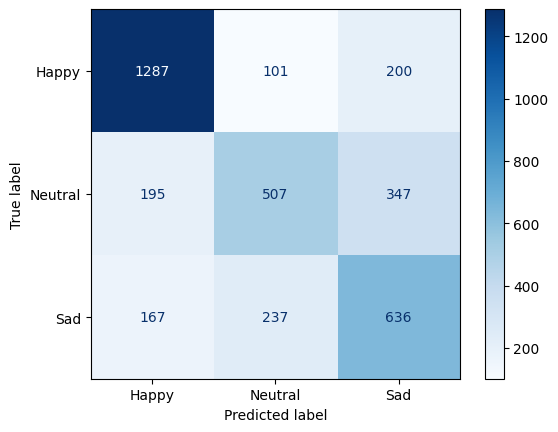

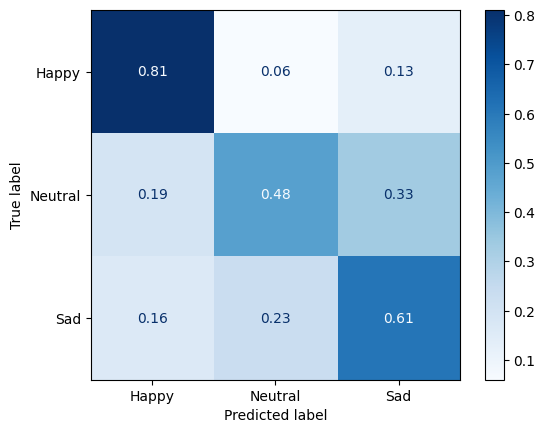

In [ ]:
plot_cm_class_report()

# Using SGD on the the final archicheture

In [ ]:
class DeboNet(nn.Module):
    def __init__(self):
        super(DeboNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
        
        # fully connected layers 
        self.fc1 = nn.Linear(in_features=64*10*10, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn1(x))
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
debo = DeboNet()
debo

DeboNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
print(f'The model has {count_parameters(debo):,} trainable parameters')

The model has 28,371,459 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
debo = debo.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
        {'params': debo.conv1.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.conv2.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.bn1.parameters(), 'lr': FOUND_LR / 8},
        {'params': debo.fc1.parameters(), 'lr': FOUND_LR / 6},
        {'params': debo.fc2.parameters(), 'lr': FOUND_LR / 4},
        {'params': debo.out.parameters(), 'lr': FOUND_LR / 2},
        ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler =  changeepochs(100, sgd)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(100, debo, sgd, scheduler)

Epoch: 01 | Epoch Time: 0m 16s
	Train Loss: 1.091 | Train Acc:  40.46% |
	Valid Loss: 1.085 | Valid Acc:  43.53% |
Epoch: 02 | Epoch Time: 0m 17s
	Train Loss: 1.081 | Train Acc:  43.20% |
	Valid Loss: 1.078 | Valid Acc:  43.50% |
Epoch: 03 | Epoch Time: 0m 14s
	Train Loss: 1.076 | Train Acc:  43.18% |
	Valid Loss: 1.076 | Valid Acc:  43.50% |
Epoch: 04 | Epoch Time: 0m 15s
	Train Loss: 1.074 | Train Acc:  43.22% |
	Valid Loss: 1.074 | Valid Acc:  43.50% |
Epoch: 05 | Epoch Time: 0m 14s
	Train Loss: 1.073 | Train Acc:  43.18% |
	Valid Loss: 1.072 | Valid Acc:  43.50% |
Epoch: 06 | Epoch Time: 0m 15s
	Train Loss: 1.071 | Train Acc:  43.21% |
	Valid Loss: 1.070 | Valid Acc:  43.50% |
Epoch: 07 | Epoch Time: 0m 15s
	Train Loss: 1.069 | Train Acc:  43.20% |
	Valid Loss: 1.067 | Valid Acc:  43.50% |
Epoch: 08 | Epoch Time: 0m 15s
	Train Loss: 1.065 | Train Acc:  43.24% |
	Valid Loss: 1.064 | Valid Acc:  43.50% |
Epoch: 09 | Epoch Time: 0m 15s
	Train Loss: 1.062 | Train Acc:  43.39% |
	Valid 

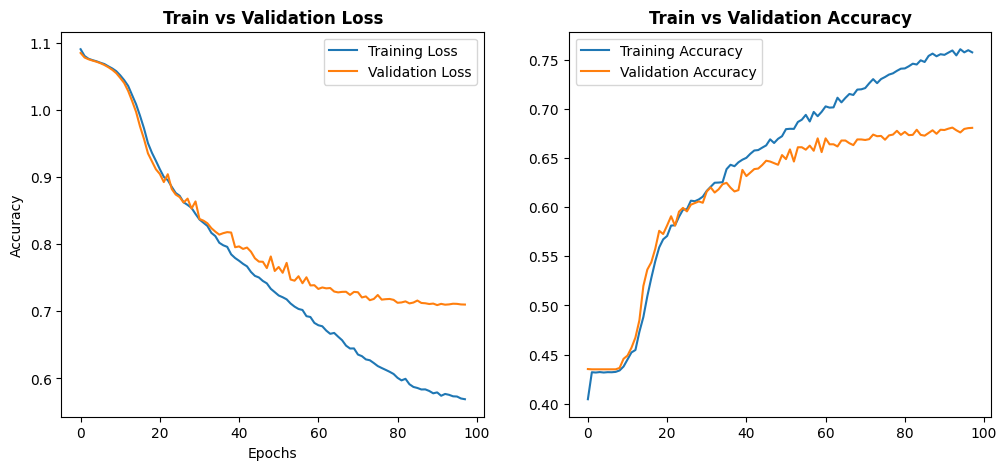

In [ ]:
plot_loss_acc()

In [ ]:
images, labels, probs = get_predictions_self(debo, test_iter)
# test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
# y_test = np.array(test.drop(['id'], axis=1))
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]
plot_roc_curves(y_test, probs, class_names)

NameError: name 'get_predictions_self' is not defined

[[1356  117  115]
 [ 169  621  259]
 [ 196  281  563]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1588
           1       0.61      0.59      0.60      1049
           2       0.60      0.54      0.57      1040

    accuracy                           0.69      3677
   macro avg       0.67      0.66      0.66      3677
weighted avg       0.68      0.69      0.69      3677



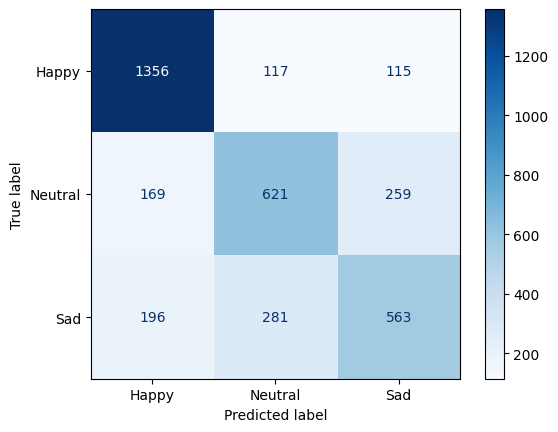

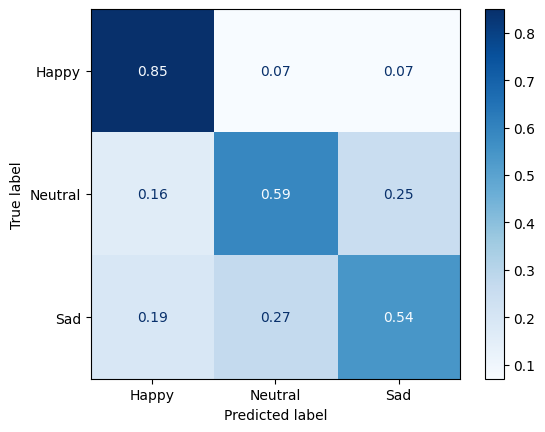

In [ ]:
plot_cm_class_report()

# Using SGD Nesterov

In [ ]:
class DeboNet(nn.Module):
    def __init__(self):
        super(DeboNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
        
        # fully connected layers 
        self.fc1 = nn.Linear(in_features=64*10*10, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn1(x))
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
debo = DeboNet()
debo

DeboNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=6400, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=3, bias=True)
)

In [ ]:
print(f'The model has {count_parameters(debo):,} trainable parameters')

The model has 28,371,459 trainable parameters


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
debo = debo.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
        {'params': debo.conv1.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.conv2.parameters(), 'lr': FOUND_LR / 10},
        {'params': debo.bn1.parameters(), 'lr': FOUND_LR / 8},
        {'params': debo.fc1.parameters(), 'lr': FOUND_LR / 6},
        {'params': debo.fc2.parameters(), 'lr': FOUND_LR / 4},
        {'params': debo.out.parameters(), 'lr': FOUND_LR / 2},
        ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
counter = 0
patience = 8
best_valid_loss = float('inf')
best_epoch = 0
best_val_acc = float('inf')
train_accs = []
valid_accs = []
train_losses = []
valid_losses = []
for epoch in range(100):        
    start_time = time.monotonic()
    train_loss, train_acc = train_self(debo, train_iter, sgd_nesterov_opt, criterion, device)
    valid_loss, valid_acc = evaluate_self(debo, valid_iter, criterion, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_val_acc = valid_acc
        best_epoch = epoch
        torch.save(debo.state_dict(), 'debonet_sgd_nes.pt')
        counter = 0
    else:
        counter += 1  # increase patience counter on no improvement
        if counter >= patience:
            print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
            break

    

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:6.2f}% |")
    print(f"\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:6.2f}% |")
print(f"best epcoh: {best_epoch+1}, best _validation accuracy: {best_val_acc}, best Validation loss: {best_valid_loss}")

Epoch: 01 | Epoch Time: 0m 30s
	Train Loss: 1.095 | Train Acc:  37.62% |
	Valid Loss: 1.086 | Valid Acc:  43.50% |
Epoch: 02 | Epoch Time: 0m 14s
	Train Loss: 1.081 | Train Acc:  43.20% |
	Valid Loss: 1.078 | Valid Acc:  43.50% |
Epoch: 03 | Epoch Time: 0m 14s
	Train Loss: 1.076 | Train Acc:  43.20% |
	Valid Loss: 1.075 | Valid Acc:  43.50% |
Epoch: 04 | Epoch Time: 0m 14s
	Train Loss: 1.074 | Train Acc:  43.21% |
	Valid Loss: 1.073 | Valid Acc:  43.50% |
Epoch: 05 | Epoch Time: 0m 14s
	Train Loss: 1.073 | Train Acc:  43.24% |
	Valid Loss: 1.072 | Valid Acc:  43.50% |
Epoch: 06 | Epoch Time: 0m 14s
	Train Loss: 1.072 | Train Acc:  43.22% |
	Valid Loss: 1.071 | Valid Acc:  43.50% |
Epoch: 07 | Epoch Time: 0m 14s
	Train Loss: 1.071 | Train Acc:  43.25% |
	Valid Loss: 1.070 | Valid Acc:  43.50% |
Epoch: 08 | Epoch Time: 0m 19s
	Train Loss: 1.070 | Train Acc:  43.21% |
	Valid Loss: 1.068 | Valid Acc:  43.50% |
Epoch: 09 | Epoch Time: 0m 22s
	Train Loss: 1.068 | Train Acc:  43.21% |
	Valid 

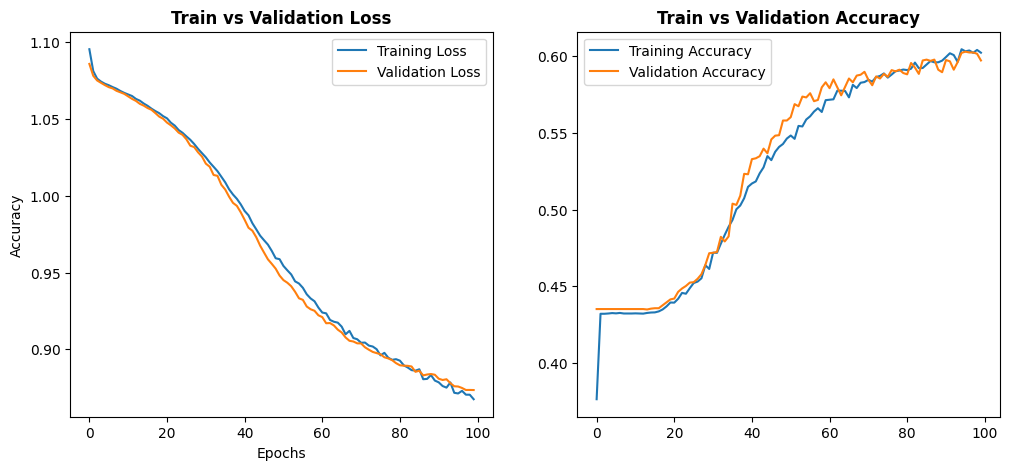

In [ ]:
plot_loss_acc()

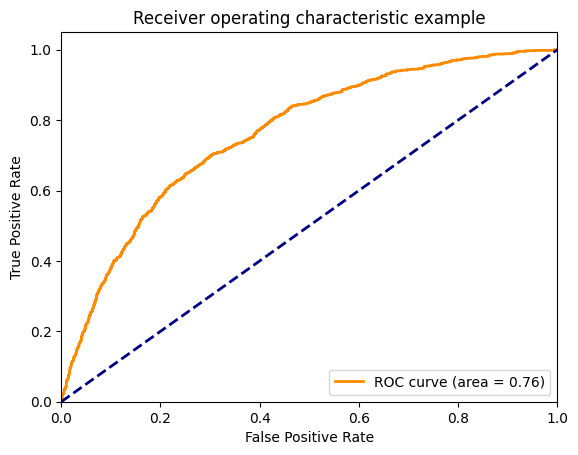

C:\Users\kings\AppData\Local\Temp\ipykernel_12220\3032910195.py:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


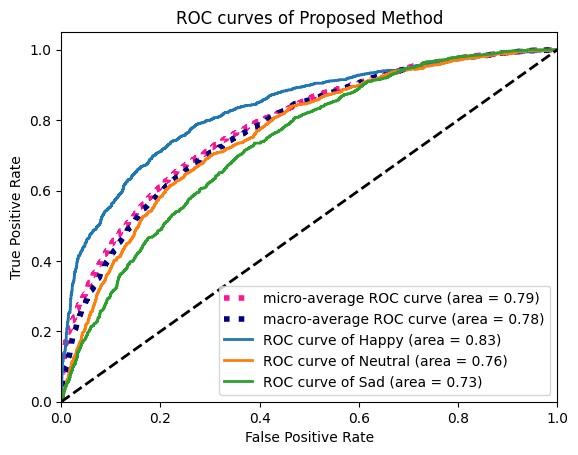

In [ ]:
images, labels, probs = get_predictions_self(debo, test_iter)
# test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
# y_test = np.array(test.drop(['id'], axis=1))
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
class_names = [class_dict[label] for label in class_names]
plot_roc_curves(y_test, probs, class_names)

[[1299  124  165]
 [ 326  533  190]
 [ 349  294  397]]
['Happy', 'Neutral', 'Sad']
[1588 1049 1040]
[[1588. 1588. 1588.]
 [1049. 1049. 1049.]
 [1040. 1040. 1040.]]
              precision    recall  f1-score   support

           0       0.66      0.82      0.73      1588
           1       0.56      0.51      0.53      1049
           2       0.53      0.38      0.44      1040

    accuracy                           0.61      3677
   macro avg       0.58      0.57      0.57      3677
weighted avg       0.59      0.61      0.59      3677



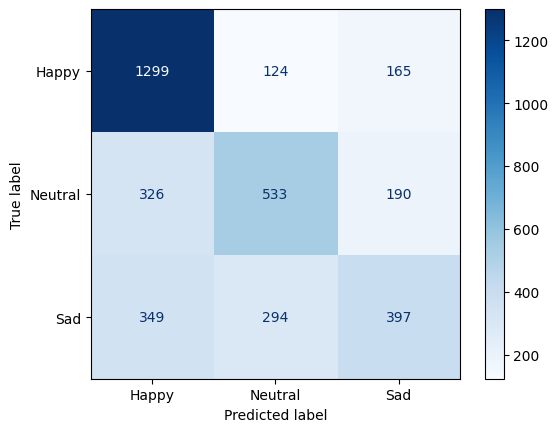

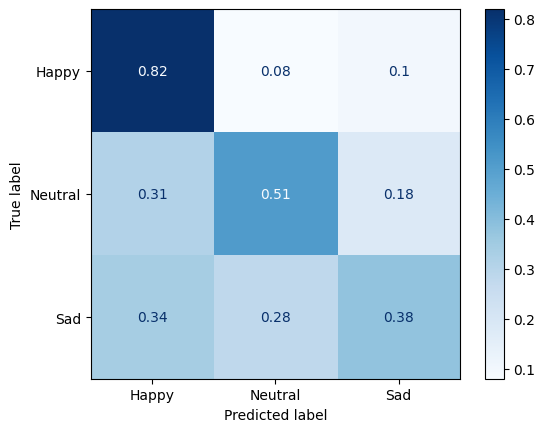

In [ ]:
plot_cm_class_report()

In [ ]:
def normalize_image(image):
  image_min = image.min()
  image_max = image.max()
  image.clamp_(min=image_min, max=image_max)
  image.add_(-image_min).div_(image_max - image_min + 1e-5)
  return image

In [ ]:
def plot_filtered_images(images, filters, n_filters = None, normalize = True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim = 0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize = (30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1,2,0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap = 'bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off');

    fig.subplots_adjust(hspace = -0.6)

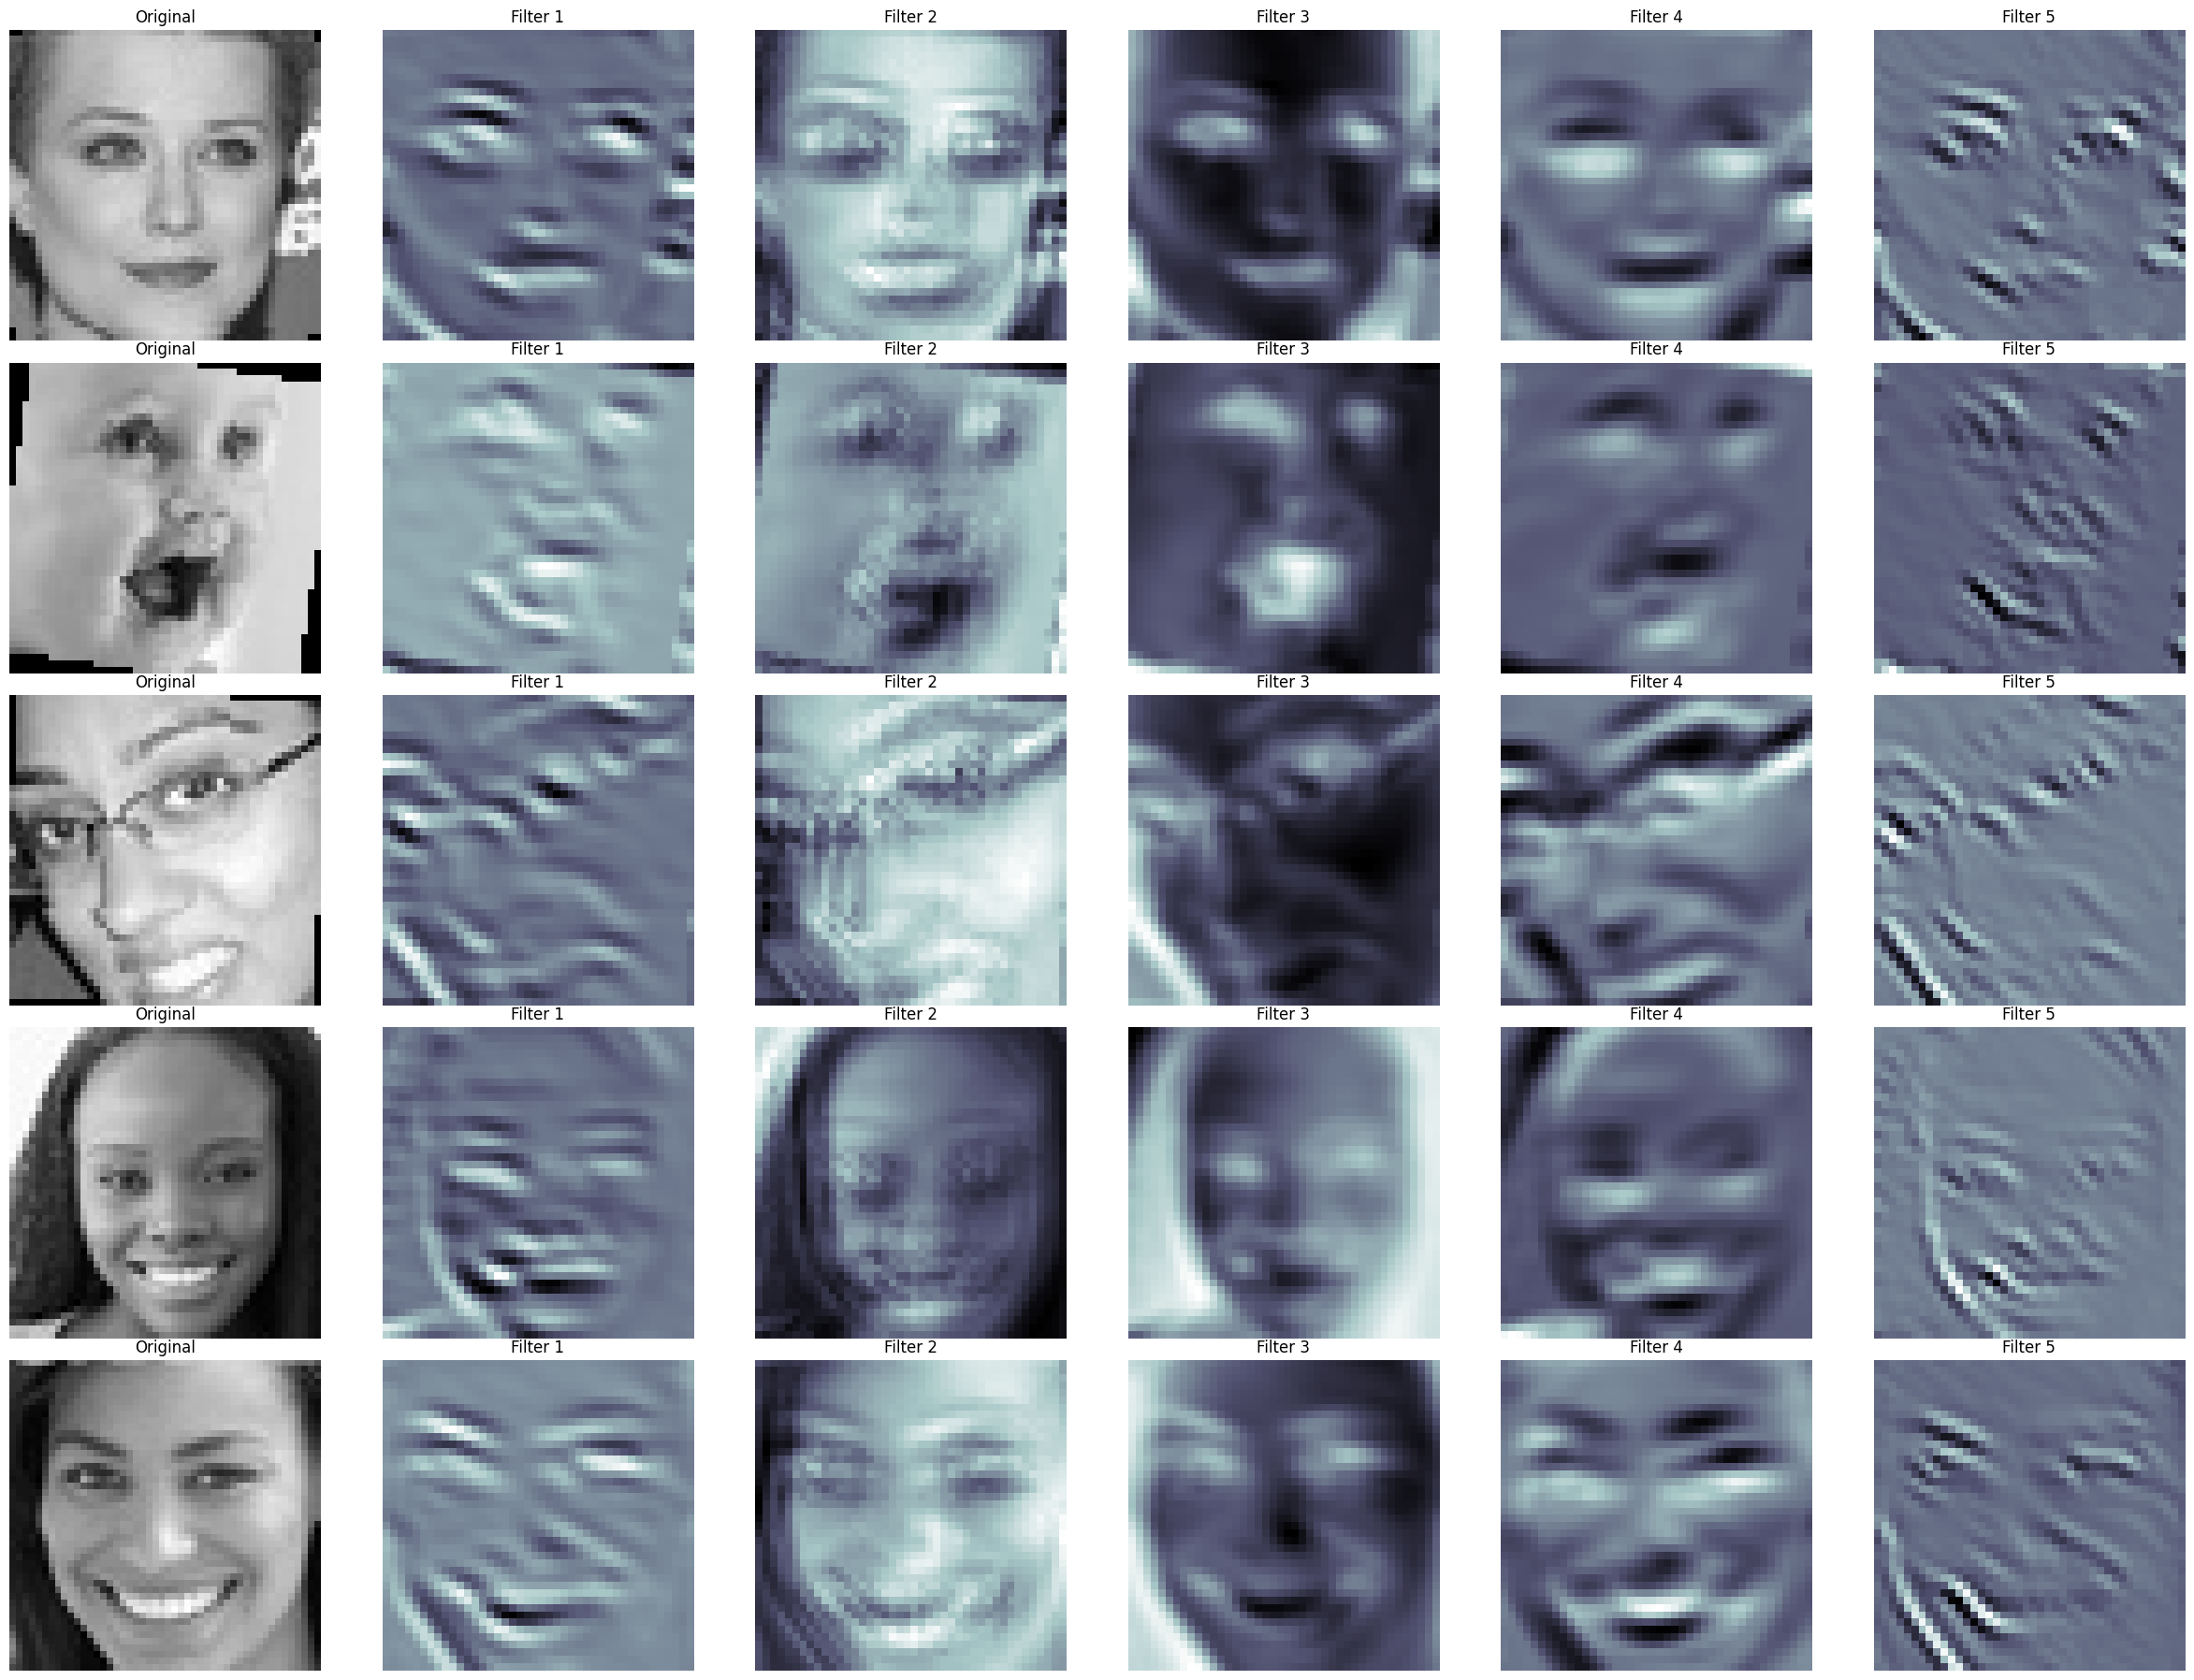

In [ ]:
N_IMAGES = 5
N_FILTERS = 5

images = [image for image, label in [train[i] for i in range(N_IMAGES)]]
filters = resnet_model.conv1.weight.data

plot_filtered_images(images, filters, N_FILTERS)

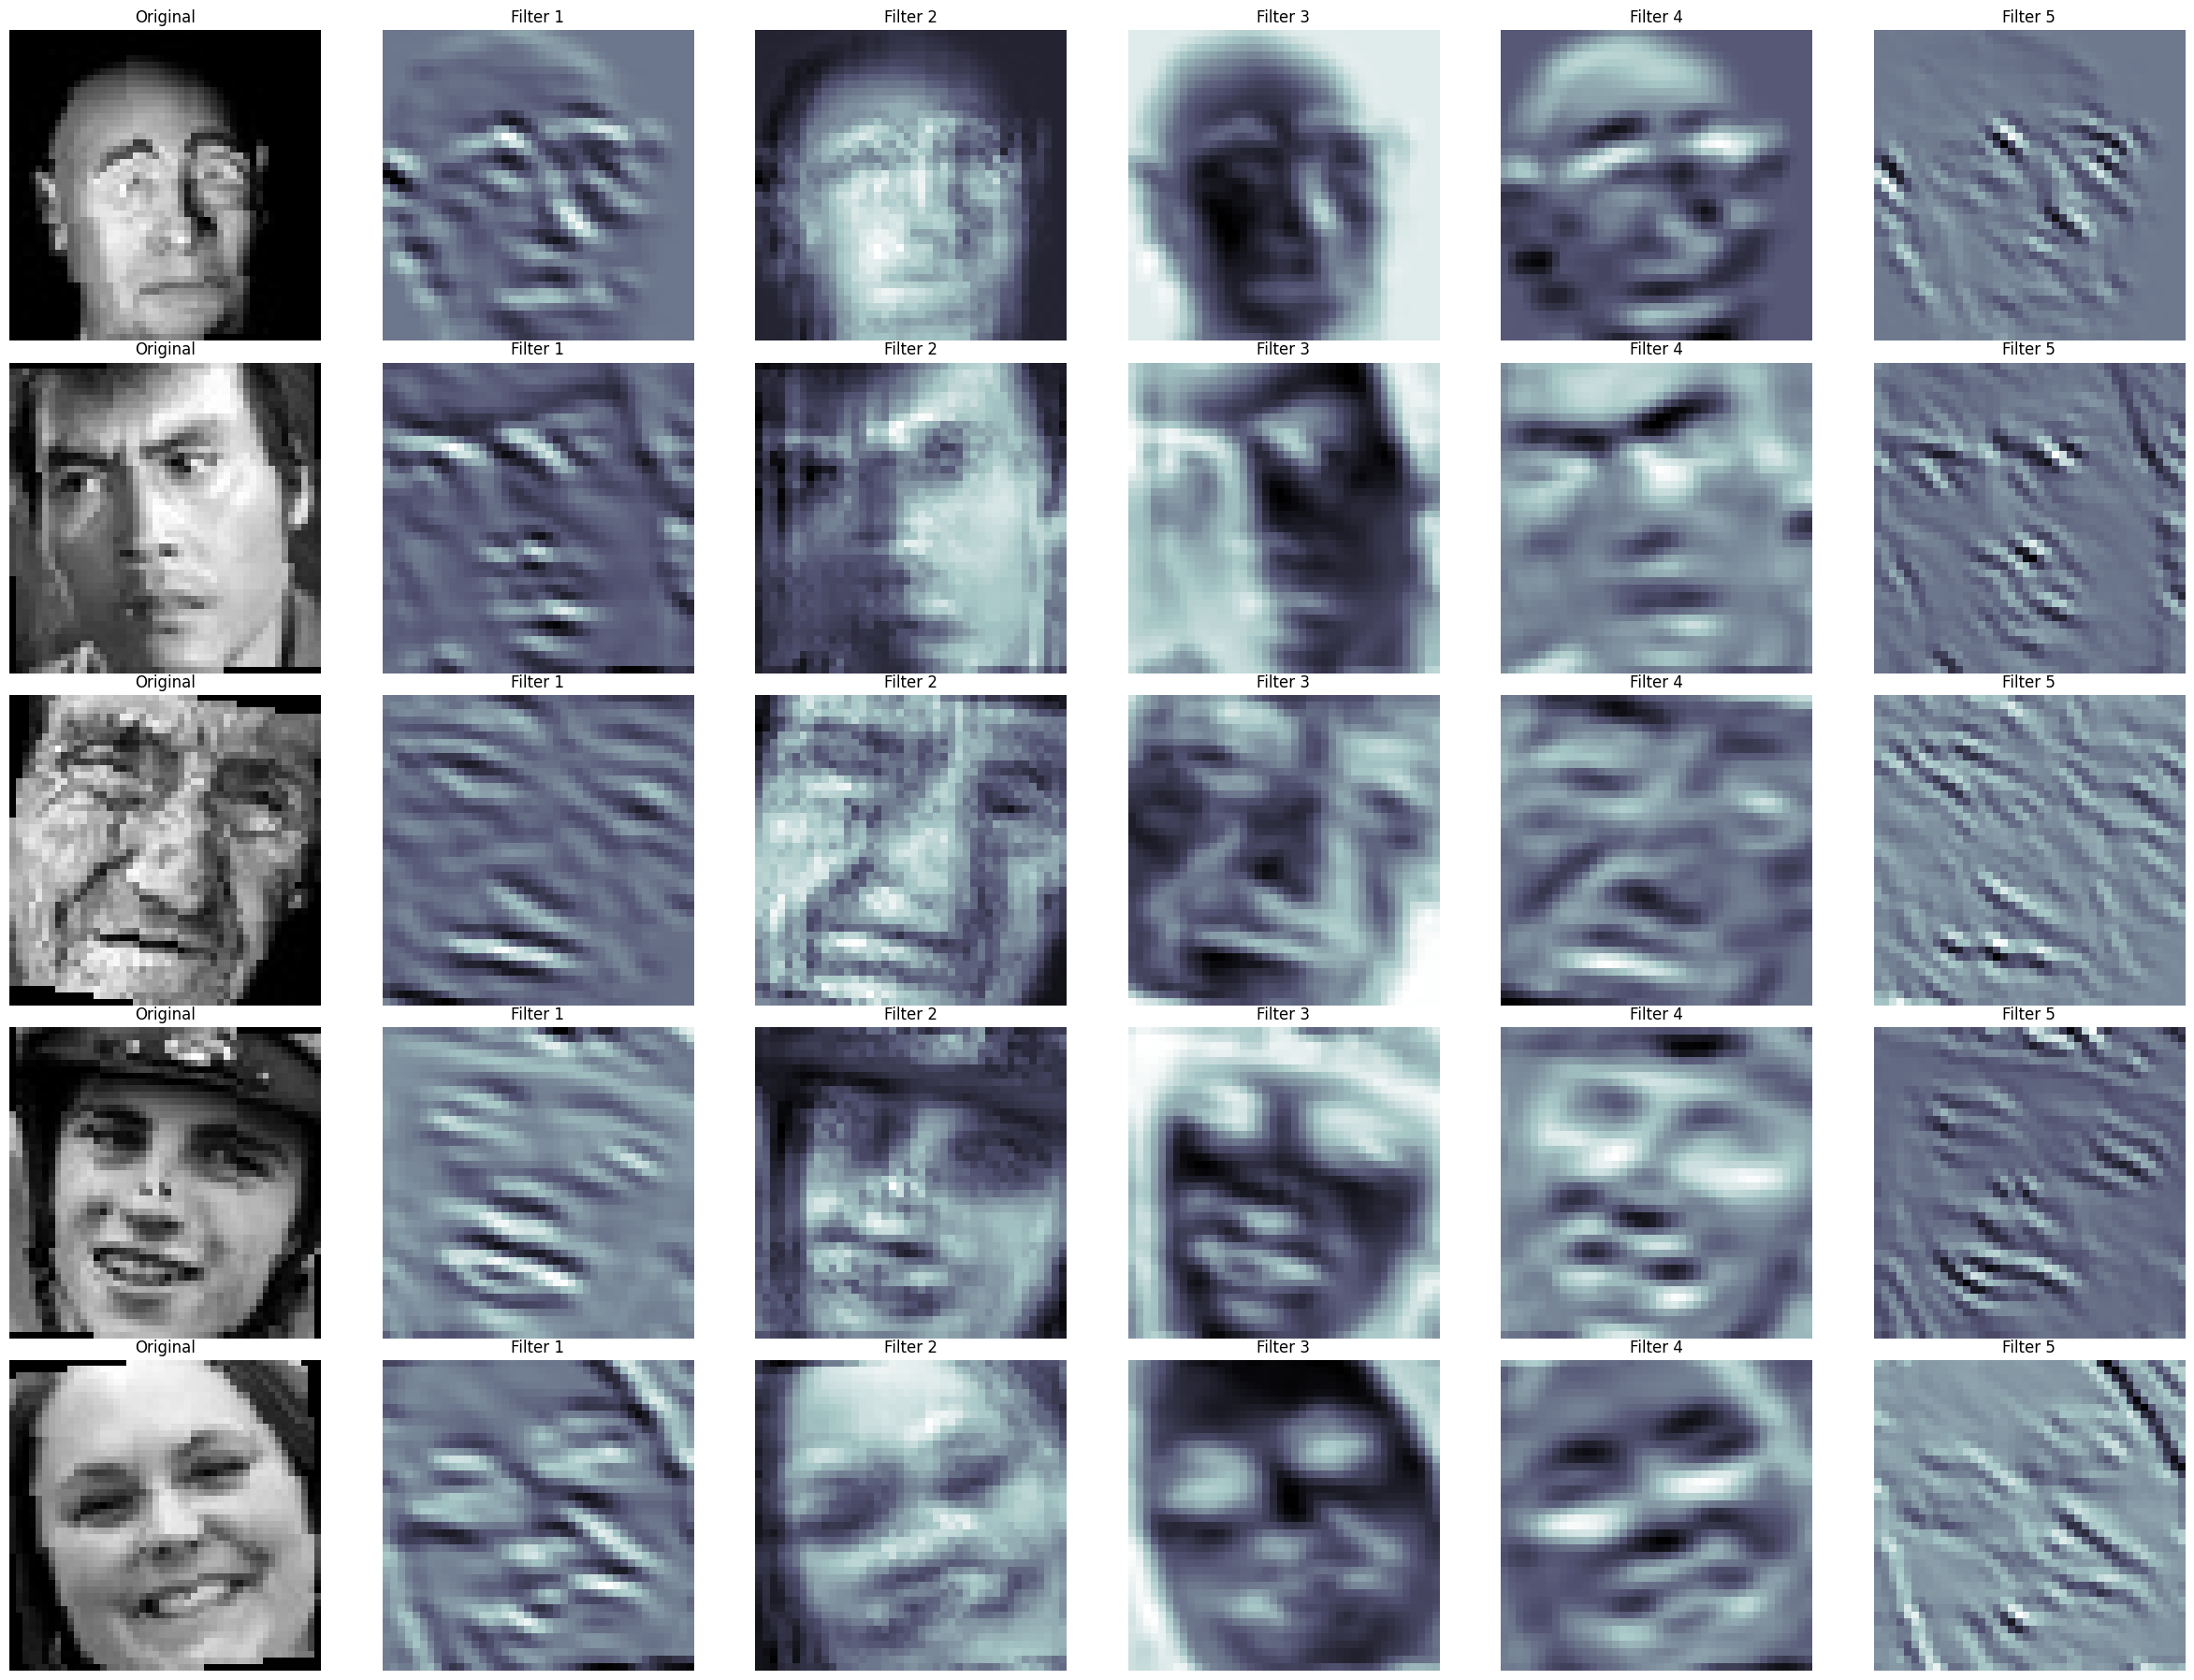

In [ ]:
N_IMAGES = 5

images, labels = next(iter(train_iter))
image_label_pairs = list(zip(images, labels))
random.shuffle(image_label_pairs)
shuffled_images, shuffled_labels = zip(*image_label_pairs)
classes = train.classes

plot_filtered_images(shuffled_images[:N_IMAGES], filters, N_FILTERS)